## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


## Loading And Preprocessing Data

In [2]:
user_train = pd.read_csv('BookVistaUserTrain.csv')
orders = pd.read_csv('BookvistaOrders.csv')
additions = pd.read_csv('BookvistaAdditions.csv')
user_test = pd.read_csv('BookVistaUserTest.csv')

In [3]:
user_train

,State,GiftSubscription,CurrentGiftSubscription,SportsDigest,FashionFiesta,ScientificWeekly,SiteViewsDays0_30,SiteViewsDays30_60,SiteViewsDays60_90,SiteSearchesDays0_30,...,RejectRate30_60,CTR60_90,OpenRate60_90,RejectRate60_90,Area Code,Ratings0_90,SubscriptionCreatedAt,Age,UserId,ChurnedIn90Days
0,CA,0,0,0,0,1,0.778371,0.403443,0.472278,0.586075,...,0.922101,0.687345,0.745387,0.561824,94109,1,2018-07-21 20:32:09.71 UTC,NaN,u'51229,1
1,PA,0,0,0,1,0,0.691800,0.747718,0.417590,0.202681,...,0.380577,0.506436,0.373384,0.204383,16823,0,2018-02-12 22:47:26.006 UTC,NaN,u'41237,1
2,ID,0,0,0,1,0,0.607371,0.216752,0.175852,0.262661,...,0.134779,0.554717,0.463854,0.750142,83843,0,2018-04-05 21:03:04.632 UTC,27.0,u'77737,0
3,NJ,0,0,0,0,0,0.386824,0.732198,0.475310,0.678900,...,0.300434,0.546062,0.589556,0.098910,7940,0,2018-02-01 15:10:45.666 UTC,21.0,u'28690,0
4,MN,0,0,1,1,0,0.280591,0.252174,0.287835,0.441058,...,0.415581,0.324650,0.426594,0.155010,56071,0,2018-03-04 20:47:12.953 UTC,NaN,u'73354,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54124,WA,0,0,1,0,0,0.119987,0.674796,0.579767,0.711531,...,0.321849,0.744721,0.448631,0.684558,98036,0,2018-06-09 17:49:13.959 UTC,NaN,u'6266,1
54125,CA,0,0,1,0,1,0.170867,0.263719,0.385870,0.422523,...,0.226797,0.464708,0.564333,0.851925,92104,0,2018-03-09 21:46:48.303 UTC,NaN,u'54887,0
54126,MD,0,0,0,0,1,0.627750,0.354588,0.683951,0.403622,...,0.638656,0.730559,0.375561,0.292392,20910,0,2018-06-05 00:05:49.182 UTC,NaN,u'76821,0
54127,CT,0,0,0,1,1,0.863071,0.431832,0.245932,0.321655,...,0.579894,0.169998,0.546452,0.382997,6039,0,2018-03-25 18:36:59.24 UTC,NaN,u'861,1


In [4]:
# Transpose data for seeing all columns without scrolling

user_train.head().T

,0,1,2,3,4
State,CA,PA,ID,NJ,MN
GiftSubscription,0,0,0,0,0
CurrentGiftSubscription,0,0,0,0,0
SportsDigest,0,0,0,0,1
FashionFiesta,0,1,1,0,1
ScientificWeekly,1,0,0,0,0
SiteViewsDays0_30,0.778371,0.6918,0.607371,0.386824,0.280591
SiteViewsDays30_60,0.403443,0.747718,0.216752,0.732198,0.252174
SiteViewsDays60_90,0.472278,0.41759,0.175852,0.47531,0.287835
SiteSearchesDays0_30,0.586075,0.202681,0.262661,0.6789,0.441058


In [5]:
orders

,UserId,OrderId,TotalPromotions,OrderCreatedAt,OrderValue,ItemValue,NoItems
0,u'26632,o'8753699,0.0,2019-01-16 12:19:32.71 UTC,120.48,120.48,13
1,u'67279,o'1348054,0.0,2018-11-17 13:29:25.584 UTC,35.00,35.00,1
2,u'18294,o'7851664,0.0,2018-11-15 13:48:21.702 UTC,35.00,35.00,1
3,u'2319,o'4103893,0.0,2018-11-14 13:46:41.606 UTC,35.00,35.00,1
4,u'26528,o'9773076,0.0,2018-10-09 12:16:34.354 UTC,35.00,35.00,1
...,...,...,...,...,...,...,...
527061,u'23782,o'6274469,-9.0,2019-01-07 07:38:16.54 UTC,26.05,35.00,1
527062,u'2117,o'9867408,-7.0,2018-12-07 07:37:05.388 UTC,28.18,35.00,1
527063,u'80645,o'5901040,0.0,2019-01-26 12:50:17.99 UTC,35.77,35.00,1
527064,u'3282,o'463637,0.0,2018-03-05 12:58:36.123 UTC,42.99,42.99,2


In [6]:
orders.describe()

,TotalPromotions,OrderValue,ItemValue,NoItems
count,527066.000000,527066.000000,527066.000000,527066.000000
mean,-1.093706,47.392238,47.993023,2.071213
std,3.554338,31.612442,30.695005,2.363875
min,-182.940000,25.000000,26.990000,0.000000
25%,0.000000,35.000000,35.000000,1.000000
50%,0.000000,35.430000,35.000000,1.000000
75%,0.000000,49.580000,49.380000,2.000000
max,0.000000,715.640000,715.640000,44.000000


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527066 entries, 0 to 527065
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UserId           527066 non-null  object 
 1   OrderId          527066 non-null  object 
 2   TotalPromotions  527066 non-null  float64
 3   OrderCreatedAt   501075 non-null  object 
 4   OrderValue       527066 non-null  float64
 5   ItemValue        527066 non-null  float64
 6   NoItems          527066 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 28.1+ MB


In [8]:
orders.isnull().sum()

UserId                 0
OrderId                0
TotalPromotions        0
OrderCreatedAt     25991
OrderValue             0
ItemValue              0
NoItems                0
dtype: int64

In [9]:
additions

,UserId,AdditionCreatedAt
0,u'326,2018-04-23 19:52:28.587 UTC
1,u'326,2018-07-19 02:15:21.527 UTC
2,u'29345,2019-02-24 21:42:42.865 UTC
3,u'29345,2019-02-25 01:20:05.834 UTC
4,u'29345,2019-02-25 01:22:20.152 UTC
...,...,...
167821,u'16387,2018-06-18 01:20:50.278 UTC
167822,u'16387,2018-06-18 01:21:26.277 UTC
167823,u'16387,2018-06-18 02:33:31.561 UTC
167824,u'26919,2019-03-09 14:28:21.762 UTC


In [10]:
additions.describe()

,UserId,AdditionCreatedAt
count,167826,167826
unique,30265,167826
top,u'20231,2018-04-23 19:52:28.587 UTC
freq,459,1


In [11]:
additions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167826 entries, 0 to 167825
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   UserId             167826 non-null  object
 1   AdditionCreatedAt  167826 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [12]:
additions.isnull().sum()

UserId               0
AdditionCreatedAt    0
dtype: int64

In [13]:
user_test

,State,GiftSubscription,CurrentGiftSubscription,SportsDigest,FashionFiesta,ScientificWeekly,SiteViewsDays0_30,SiteViewsDays30_60,SiteViewsDays60_90,SiteSearchesDays0_30,...,OpenRate30_60,RejectRate30_60,CTR60_90,OpenRate60_90,RejectRate60_90,Area Code,Ratings0_90,SubscriptionCreatedAt,Age,UserId
0,IL,0,0,1,1,0,0.299150,0.786258,0.483000,0.224666,...,0.503703,0.489418,0.811964,0.390893,0.441288,60093,0,2018-03-18 02:41:54.921 UTC,NaN,u'45880
1,TN,0,0,0,0,0,0.437613,0.681124,0.435349,0.181486,...,0.518835,0.109676,0.784325,0.686880,0.569406,37075,0,2018-07-26 00:16:42.298 UTC,21.0,u'61934
2,CA,0,0,1,0,1,0.466072,0.701760,0.613621,0.311053,...,0.534714,0.587728,0.282338,0.475452,0.776881,92115,1,2018-09-13 19:08:05.748 UTC,NaN,u'45550
3,IN,0,0,0,0,1,0.286013,0.441691,0.263533,0.628548,...,0.253961,0.238303,0.596699,0.206753,0.136656,46107,0,2018-08-26 22:19:50.012 UTC,30.0,u'24365
4,MN,0,0,1,0,0,0.180726,0.171129,0.511562,0.142202,...,0.617659,0.628649,0.297704,0.671474,0.822081,55082,0,2018-12-02 19:38:15.098 UTC,NaN,u'43500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26657,IL,1,1,0,1,0,0.431897,0.820418,0.333008,0.188824,...,0.359406,0.462497,0.250643,0.458159,0.825736,60202,0,2019-05-02 11:16:35.097 UTC,NaN,u'51989
26658,CA,0,0,0,0,1,0.715776,0.256456,0.372922,0.873259,...,0.613581,0.317322,0.338127,0.590822,0.309306,95054,0,2018-12-27 05:17:28.441 UTC,NaN,u'47557
26659,WA,0,0,0,1,1,0.538154,0.828546,0.642993,0.388115,...,0.303120,0.730560,0.730394,0.584616,0.840823,98201,0,2018-09-23 20:45:46.43 UTC,29.0,u'16626
26660,PA,0,0,1,0,1,0.796749,0.622956,0.575803,0.531680,...,0.375014,0.283586,0.416808,0.268604,0.688042,18902,0,2018-08-23 22:15:20.552 UTC,NaN,u'51706


In [14]:
# Transpose data for seeing all columns without scrolling
user_test.head().T

,0,1,2,3,4
State,IL,TN,CA,IN,MN
GiftSubscription,0,0,0,0,0
CurrentGiftSubscription,0,0,0,0,0
SportsDigest,1,0,1,0,1
FashionFiesta,1,0,0,0,0
ScientificWeekly,0,0,1,1,0
SiteViewsDays0_30,0.29915,0.437613,0.466072,0.286013,0.180726
SiteViewsDays30_60,0.786258,0.681124,0.70176,0.441691,0.171129
SiteViewsDays60_90,0.483,0.435349,0.613621,0.263533,0.511562
SiteSearchesDays0_30,0.224666,0.181486,0.311053,0.628548,0.142202


In [15]:
print(len(user_train))
print(len(orders))
print(len(additions))
print(len(user_test))

54129
527066
167826
26662


In [16]:
user_train.dtypes

State                       object
GiftSubscription             int64
CurrentGiftSubscription      int64
SportsDigest                 int64
FashionFiesta                int64
ScientificWeekly             int64
SiteViewsDays0_30          float64
SiteViewsDays30_60         float64
SiteViewsDays60_90         float64
SiteSearchesDays0_30       float64
SiteSearchesDays30_60      float64
SiteSearchesDays60_90      float64
HouseHoldIncome            float64
CTR30                      float64
OpenRate30                 float64
RejectRate30               float64
CTR30_60                   float64
OpenRate30_60              float64
RejectRate30_60            float64
CTR60_90                   float64
OpenRate60_90              float64
RejectRate60_90            float64
Area Code                   object
Ratings0_90                  int64
SubscriptionCreatedAt       object
Age                        float64
UserId                      object
ChurnedIn90Days              int64
dtype: object

Except for the 3 columns - State, Area Code, and UserId, all columns are numerical.

In [17]:
orders.dtypes

UserId              object
OrderId             object
TotalPromotions    float64
OrderCreatedAt      object
OrderValue         float64
ItemValue          float64
NoItems              int64
dtype: object

In [18]:
additions.dtypes

UserId               object
AdditionCreatedAt    object
dtype: object

In [19]:
user_train.isnull().sum()

State                          0
GiftSubscription               0
CurrentGiftSubscription        0
SportsDigest                   0
FashionFiesta                  0
ScientificWeekly               0
SiteViewsDays0_30              0
SiteViewsDays30_60             0
SiteViewsDays60_90             0
SiteSearchesDays0_30           0
SiteSearchesDays30_60          0
SiteSearchesDays60_90          0
HouseHoldIncome                0
CTR30                          0
OpenRate30                     0
RejectRate30                   0
CTR30_60                       0
OpenRate30_60                  0
RejectRate30_60                0
CTR60_90                       0
OpenRate60_90                  0
RejectRate60_90                0
Area Code                      0
Ratings0_90                    0
SubscriptionCreatedAt          0
Age                        23238
UserId                         0
ChurnedIn90Days                0
dtype: int64

In [20]:
orders.isnull().sum()

UserId                 0
OrderId                0
TotalPromotions        0
OrderCreatedAt     25991
OrderValue             0
ItemValue              0
NoItems                0
dtype: int64

In [21]:
additions.isnull().sum()

UserId               0
AdditionCreatedAt    0
dtype: int64

In [22]:
user_test.isnull().sum()

State                          0
GiftSubscription               0
CurrentGiftSubscription        0
SportsDigest                   0
FashionFiesta                  0
ScientificWeekly               0
SiteViewsDays0_30              0
SiteViewsDays30_60             0
SiteViewsDays60_90             0
SiteSearchesDays0_30           0
SiteSearchesDays30_60          0
SiteSearchesDays60_90          0
HouseHoldIncome                0
CTR30                          0
OpenRate30                     0
RejectRate30                   0
CTR30_60                       0
OpenRate30_60                  0
RejectRate30_60                0
CTR60_90                       0
OpenRate60_90                  0
RejectRate60_90                0
Area Code                      0
Ratings0_90                    0
SubscriptionCreatedAt          0
Age                        11342
UserId                         0
dtype: int64

In [23]:
user_train.columns = user_train.columns.str.replace(' ', '_')
user_test.columns = user_test.columns.str.replace(' ', '_')

In [24]:
print(user_train.columns)
print(user_test.columns)

Index(['State', 'GiftSubscription', 'CurrentGiftSubscription', 'SportsDigest',
       'FashionFiesta', 'ScientificWeekly', 'SiteViewsDays0_30',
       'SiteViewsDays30_60', 'SiteViewsDays60_90', 'SiteSearchesDays0_30',
       'SiteSearchesDays30_60', 'SiteSearchesDays60_90', 'HouseHoldIncome',
       'CTR30', 'OpenRate30', 'RejectRate30', 'CTR30_60', 'OpenRate30_60',
       'RejectRate30_60', 'CTR60_90', 'OpenRate60_90', 'RejectRate60_90',
       'Area_Code', 'Ratings0_90', 'SubscriptionCreatedAt', 'Age', 'UserId',
       'ChurnedIn90Days'],
      dtype='object')
Index(['State', 'GiftSubscription', 'CurrentGiftSubscription', 'SportsDigest',
       'FashionFiesta', 'ScientificWeekly', 'SiteViewsDays0_30',
       'SiteViewsDays30_60', 'SiteViewsDays60_90', 'SiteSearchesDays0_30',
       'SiteSearchesDays30_60', 'SiteSearchesDays60_90', 'HouseHoldIncome',
       'CTR30', 'OpenRate30', 'RejectRate30', 'CTR30_60', 'OpenRate30_60',
       'RejectRate30_60', 'CTR60_90', 'OpenRate60_90', 'Reje

In [25]:
# Change column name from 'ChurnedIn90Days' to 'churn'
user_train['churn'] = user_train['ChurnedIn90Days']
user_train.drop('ChurnedIn90Days', axis=1, inplace=True)
user_train.head().T

,0,1,2,3,4
State,CA,PA,ID,NJ,MN
GiftSubscription,0,0,0,0,0
CurrentGiftSubscription,0,0,0,0,0
SportsDigest,0,0,0,0,1
FashionFiesta,0,1,1,0,1
ScientificWeekly,1,0,0,0,0
SiteViewsDays0_30,0.778371,0.6918,0.607371,0.386824,0.280591
SiteViewsDays30_60,0.403443,0.747718,0.216752,0.732198,0.252174
SiteViewsDays60_90,0.472278,0.41759,0.175852,0.47531,0.287835
SiteSearchesDays0_30,0.586075,0.202681,0.262661,0.6789,0.441058


In [26]:
print(23238/54129)
print(25991/527066)
print(11342/26662)

0.4293077647841268
0.04931260980598255
0.425399444902858


In our train and test sets missing values are found in the age column at a rate of 43% for both datasets. In the orders dataset 4% of the OrderCreatedAt values are missing. We shall decide how these missing values need to be handled later in this notebook after exploring these columns further in the EDA section.

## Exploratory Data Analysis

In [27]:
unique_values = user_train.nunique()
print('Unique Values:')
unique_values

Unique Values:


State                         73
GiftSubscription               2
CurrentGiftSubscription        2
SportsDigest                   2
FashionFiesta                  2
ScientificWeekly               2
SiteViewsDays0_30          54127
SiteViewsDays30_60         54126
SiteViewsDays60_90         54129
SiteSearchesDays0_30       54127
SiteSearchesDays30_60      54127
SiteSearchesDays60_90      54125
HouseHoldIncome            12713
CTR30                      54126
OpenRate30                 54127
RejectRate30               54126
CTR30_60                   54128
OpenRate30_60              54127
RejectRate30_60            54126
CTR60_90                   54127
OpenRate60_90              54127
RejectRate60_90            54128
Area_Code                  16248
Ratings0_90                    6
SubscriptionCreatedAt      54129
Age                           97
UserId                     54129
churn                          2
dtype: int64

Displaying the number of unique values in our training dataset, which has 54129 rows, shows us that many of these columns show a high cardinality. The following  18 columns suffer from this deficiency and will be addressed during feaure selection:

SiteViewsDays0_30,
SiteViewsDays30_60,
SiteViewsDays60_90,
SiteSearchesDays0_30,
SiteSearchesDays30_60,
SiteSearchesDays60_90,
CTR30,
OpenRate30,
RejectRate30,
CTR30_60,
OpenRate30_60,
RejectRate30_60,
CTR60_90,
OpenRate60_90,
RejectRate60_90,
SubscriptionCreatedAt,
UserId

We shall review the following 10 remaining columns:

State,
GiftSubscription,
CurrentGiftSubscription,
SportsDigest,
FashionFiesta,
ScientificWeekly,
HouseHoldIncome,
Area_Code,
Ratings0_90,
Age

Our Target variable is 'churn' and its attributes and comparisons will be addressed several times throughout this notebook

In [28]:
rem_cols = ['GiftSubscription', 'CurrentGiftSubscription', 'SportsDigest', 'FashionFiesta',
            'ScientificWeekly']
others = ['HouseHoldIncome', 'Area_Code', 'Age']

# rem_cols are grouped together based on the fact that each of these variables are binary
# Some columns, including 'HouseHoldIncome', 'Area_Code', 'Age' will be dealt with seperately from rem_cols because of the
# number of unique values. 'States' and Ratings0_90 are also dealt with seperately in this early notebook

In [29]:
# The target variable churn has 2 unique values (i.e. 0 and 1). 

total_rows = 54129
c_value = user_train.churn.value_counts()
print(c_value)
print(c_value[0]/total_rows)
print(c_value[1]/total_rows)

1    27204
0    26925
Name: churn, dtype: int64
0.49742282325555615
0.5025771767444438


Our target variable data is balanced with each of our binary values making up about 50% of the total values.

1    27204
0    26925
Name: churn, dtype: int64


<Axes: >

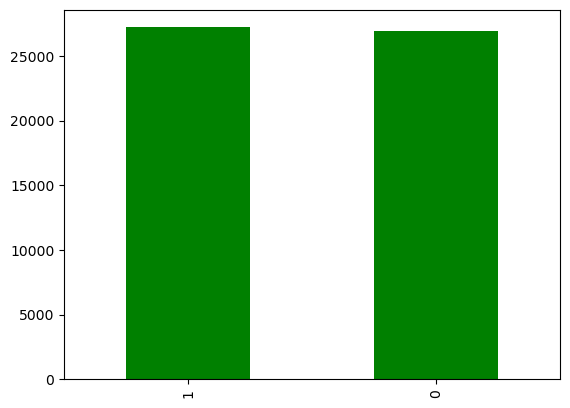

In [30]:
print(user_train['churn'].value_counts())
user_train['churn'].value_counts().plot(kind='bar', color='green')

In [31]:
plt.close()

counter = 0
ac = user_train['Area_Code'].value_counts()
for x in ac:
    if x <= 2:
        counter += 1
    else:
        continue
print(counter)

9686


In [32]:
user_train['Ratings0_90'].value_counts()

0    50984
1     2632
2      415
3       93
4        4
6        1
Name: Ratings0_90, dtype: int64

churn            0      1
Ratings0_90              
0            25365  25619
1             1301   1331
2              207    208
3               50     43
4                1      3
6                1      0
churn               0         1
Ratings0_90                    
0            0.497509  0.502491
1            0.494301  0.505699
2            0.498795  0.501205
3            0.537634  0.462366
4            0.250000  0.750000
6            1.000000  0.000000


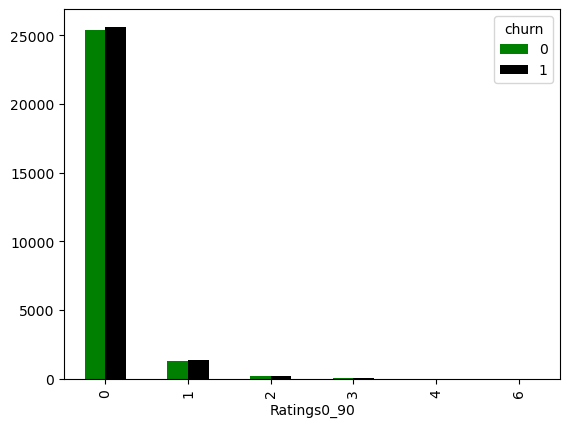

In [33]:
cross0_90 = pd.crosstab(user_train.Ratings0_90, user_train.churn)
cross0_90.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.Ratings0_90.sort_values(ascending=False), user_train.churn))
cross0_90_2 = pd.crosstab(user_train.Ratings0_90, user_train.churn, normalize='index')

print(cross0_90_2.to_string())

This graph indicates that the churn of customers based on  service ratings was nearly balanced at every rating category including where customers did not rate the service. Accordingly, this variable will add little value to our model input. The exceptions here are the ratings for 4 and 6, but for each of theses ratings, the number of people that participated is so small (4 persons and 1 person respectively) that including this metric will add klittle to any value in the churn prediction model.

In [34]:
plt.close()

user_train.State.unique()

array(['CA', 'PA', 'ID', 'NJ', 'MN', 'OH', 'NY', 'OR', 'TX', 'IN', 'NC',
       'SC', 'IA', 'NV', 'UT', 'MI', 'IL', 'WI', 'MO', 'FL', 'MD', 'MA',
       'KY', 'CO', 'GA', 'OK', 'AZ', 'WA', 'AR', 'NE', 'LA', 'VT', 'HI',
       'ME', 'SD', 'WY', 'MT', 'ON', 'CT', 'TN', 'VA', 'AL', 'WV', 'KS',
       'DC', 'NH', 'DE', 'MS', 'AK', 'VI', 'BC', 'NM', 'ND', 'RI', 'AP',
       'QC', 'AE', 'GU', 'VIC', 'AB', 'NS', 'AA', 'SK', 'NB', 'NL', 'PR',
       'QLD', 'NSW', 'NT', 'MB', 'PE', 'UM', 'YT'], dtype=object)

The state variable contains a total of 73  different state abbreviatiions. this number results from the inclusion of Canadian states and US territories and not to duplicates of state names.

Compare select variables to churn to show relationship/effect of variable on churn:


churn     0     1
State            
AA        3     0
AB        9    13
AE       15    11
AK      137   146
AL      224   234
...     ...   ...
WA     1228  1304
WI      747   754
WV       90    96
WY       78    92
YT        1     0

[73 rows x 2 columns]


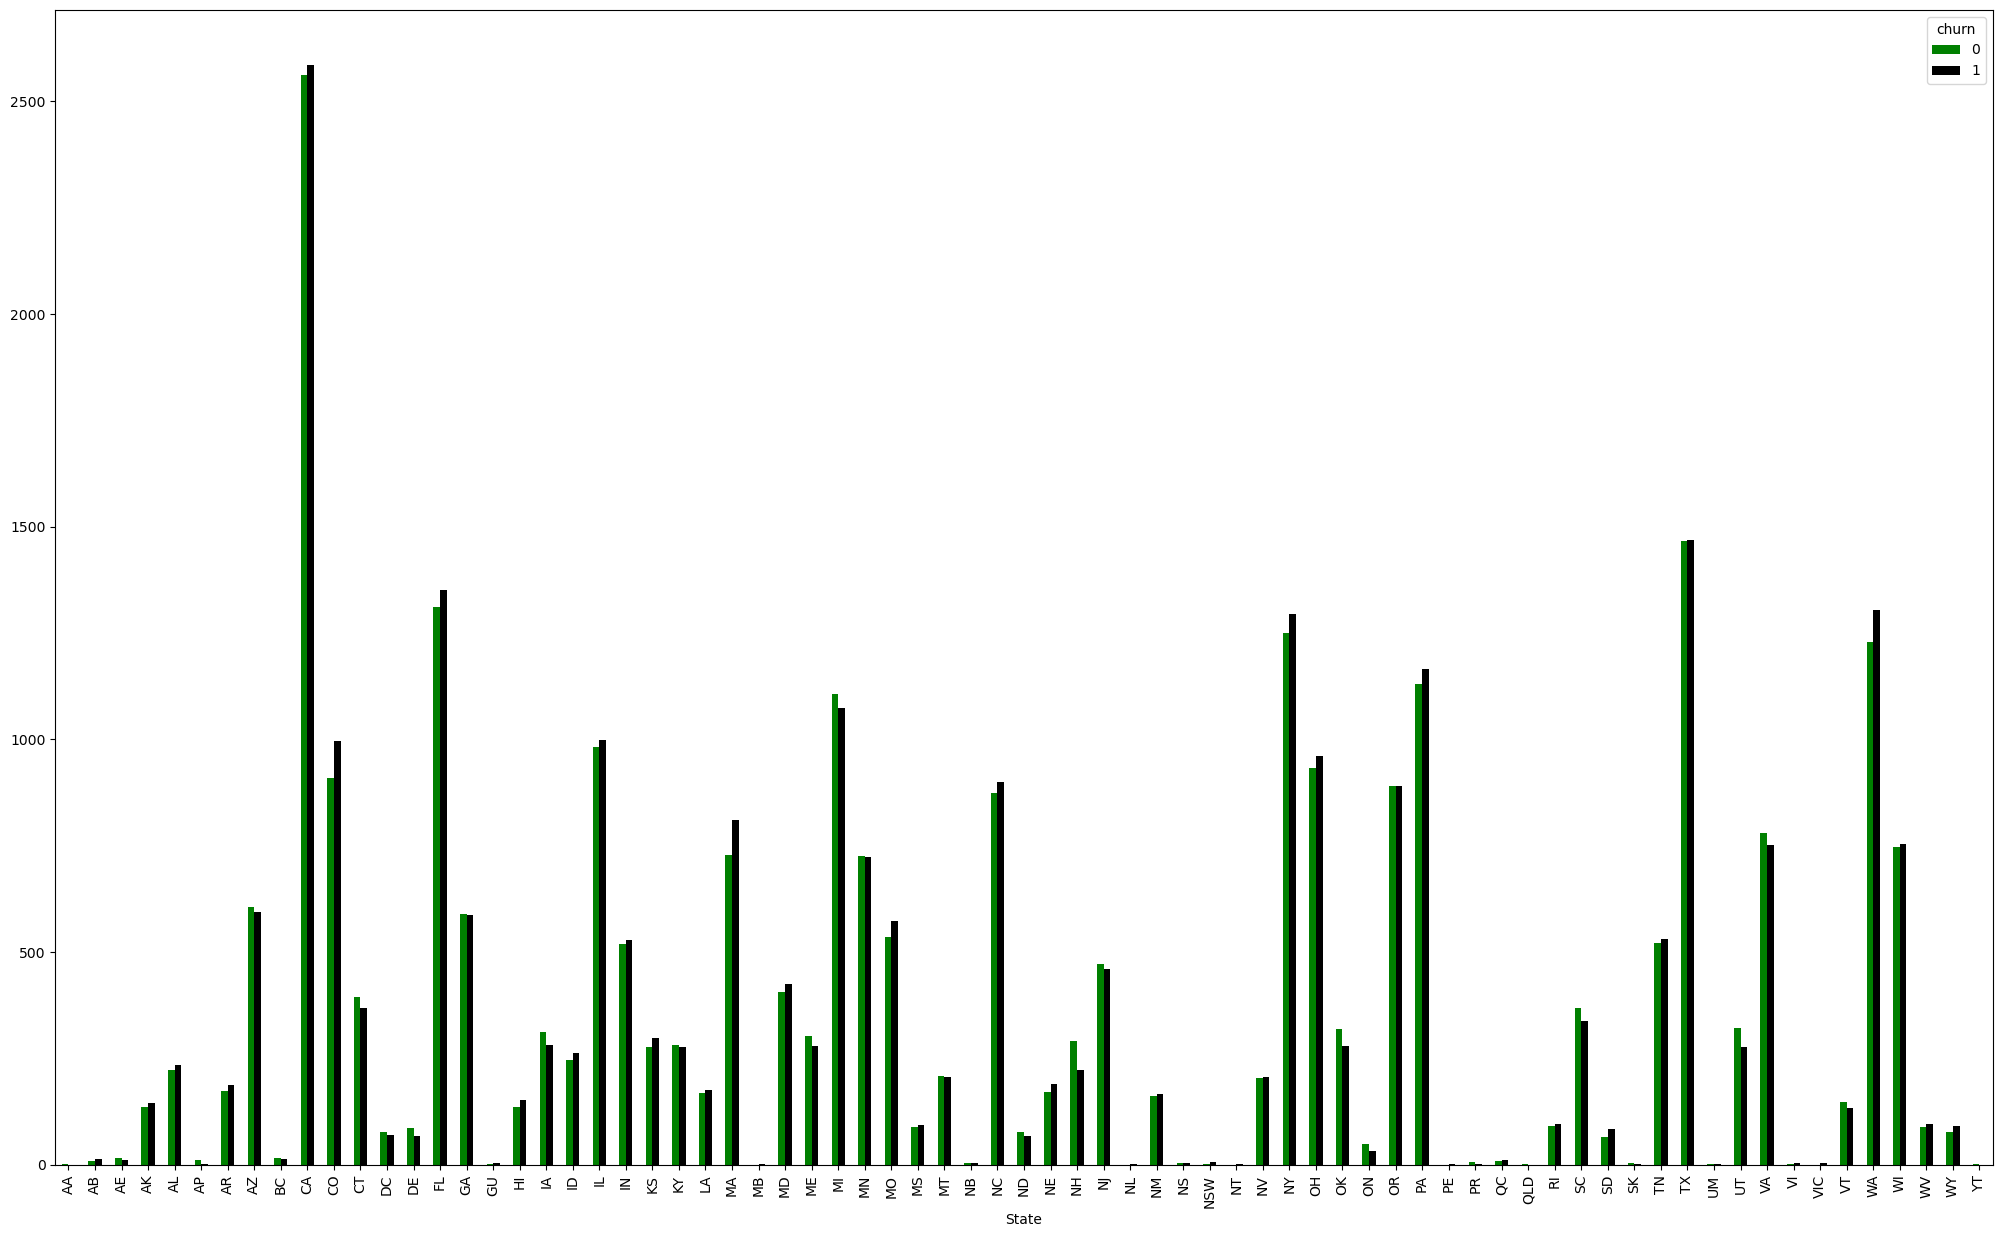

In [35]:
crossState = pd.crosstab(user_train.State, user_train.churn)
crossState.plot.bar(figsize=(25,15), color=('green', 'black'))
print(pd.crosstab(user_train.State.sort_values(ascending=False), user_train.churn))

In [36]:
plt.close()

print(crossState.to_string())

churn     0     1
State            
AA        3     0
AB        9    13
AE       15    11
AK      137   146
AL      224   234
AP       11     3
AR      173   187
AZ      605   594
BC       16    13
CA     2562  2586
CO      910   996
CT      394   369
DC       78    70
DE       86    67
FL     1312  1352
GA      590   587
GU        3     4
HI      137   152
IA      312   282
ID      247   264
IL      983   999
IN      520   529
KS      276   299
KY      282   277
LA      169   175
MA      728   810
MB        0     3
MD      406   424
ME      302   279
MI     1106  1074
MN      725   724
MO      535   573
MS       89    93
MT      209   207
NB        4     4
NC      875   899
ND       78    68
NE      171   191
NH      292   222
NJ      472   461
NL        0     1
NM      163   167
NS        4     4
NSW       2     6
NT        0     2
NV      203   206
NY     1250  1294
OH      934   962
OK      320   279
ON       49    33
OR      891   890
PA     1130  1166
PE        0     1
PR        

calculate churn rate based on state

In [37]:
crossState2 = pd.crosstab(user_train.State, user_train.churn, normalize='index')
print(crossState2.to_string())

churn         0         1
State                    
AA     1.000000  0.000000
AB     0.409091  0.590909
AE     0.576923  0.423077
AK     0.484099  0.515901
AL     0.489083  0.510917
AP     0.785714  0.214286
AR     0.480556  0.519444
AZ     0.504587  0.495413
BC     0.551724  0.448276
CA     0.497669  0.502331
CO     0.477440  0.522560
CT     0.516383  0.483617
DC     0.527027  0.472973
DE     0.562092  0.437908
FL     0.492492  0.507508
GA     0.501274  0.498726
GU     0.428571  0.571429
HI     0.474048  0.525952
IA     0.525253  0.474747
ID     0.483366  0.516634
IL     0.495964  0.504036
IN     0.495710  0.504290
KS     0.480000  0.520000
KY     0.504472  0.495528
LA     0.491279  0.508721
MA     0.473342  0.526658
MB     0.000000  1.000000
MD     0.489157  0.510843
ME     0.519793  0.480207
MI     0.507339  0.492661
MN     0.500345  0.499655
MO     0.482852  0.517148
MS     0.489011  0.510989
MT     0.502404  0.497596
NB     0.500000  0.500000
NC     0.493236  0.506764
ND     0.534

Sort churn rate values in ascending order to find US states with the least churn and the most churn

In [38]:
print(crossState2[1].sort_values().to_string())


State
AA     0.000000
QLD    0.000000
YT     0.000000
PR     0.142857
SK     0.166667
AP     0.214286
ON     0.402439
AE     0.423077
NH     0.431907
DE     0.437908
BC     0.448276
UT     0.464107
ND     0.465753
OK     0.465776
DC     0.472973
VT     0.473310
IA     0.474747
SC     0.478076
ME     0.480207
CT     0.483617
VA     0.491514
MI     0.492661
NJ     0.494105
AZ     0.495413
KY     0.495528
MT     0.497596
GA     0.498726
MN     0.499655
OR     0.499719
NS     0.500000
UM     0.500000
NB     0.500000
TX     0.500511
CA     0.502331
WI     0.502332
NV     0.503667
IL     0.504036
TN     0.504274
IN     0.504290
NM     0.506061
NC     0.506764
OH     0.507384
FL     0.507508
PA     0.507840
RI     0.508021
NY     0.508648
LA     0.508721
MD     0.510843
AL     0.510917
MS     0.510989
WA     0.515008
AK     0.515901
WV     0.516129
ID     0.516634
MO     0.517148
AR     0.519444
KS     0.520000
CO     0.522560
HI     0.525952
MA     0.526658
NE     0.527624
WY     0.541176
SD

churn                 0      1
GiftSubscription              
0                 22323  23135
1                  4602   4069
churn                    0         1
GiftSubscription                    
0                 0.491069  0.508931
1                 0.530735  0.469265
churn                        0      1
CurrentGiftSubscription              
0                        22846  23767
1                         4079   3437
churn                           0         1
CurrentGiftSubscription                    
0                        0.490121  0.509879
1                        0.542709  0.457291
churn             0      1
SportsDigest              
0             12858  13468
1             14067  13736
churn                0         1
SportsDigest                    
0             0.488414  0.511586
1             0.505953  0.494047
churn              0      1
FashionFiesta              
0              14882  14935
1              12043  12269
churn                 0         1
FashionFiesta 

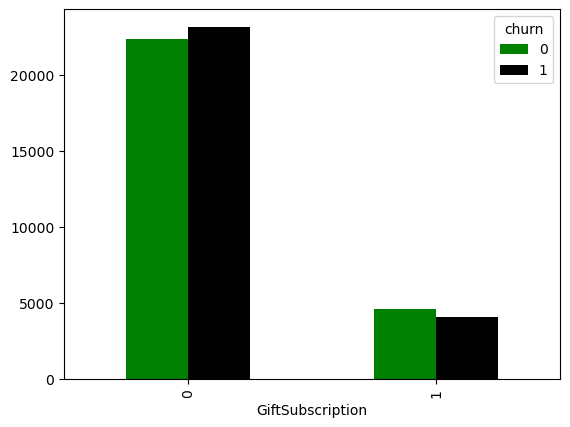

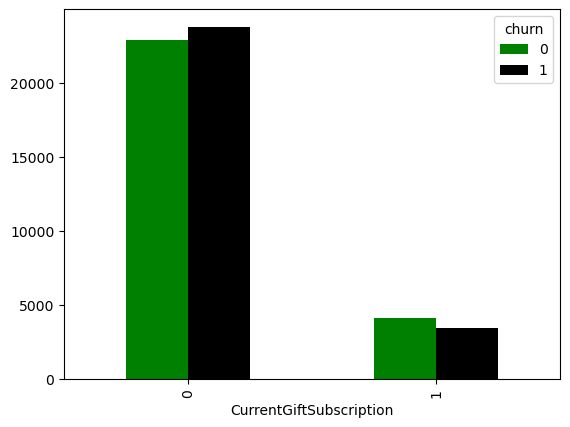

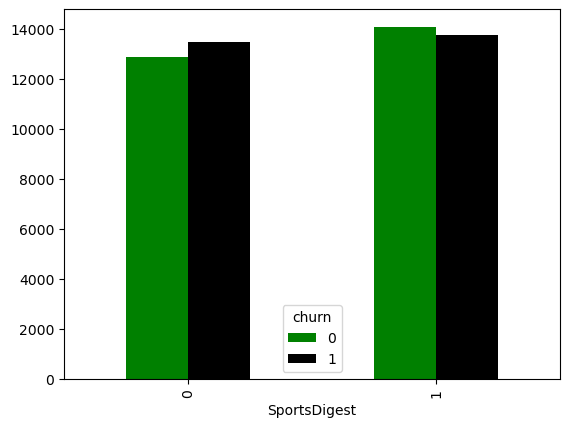

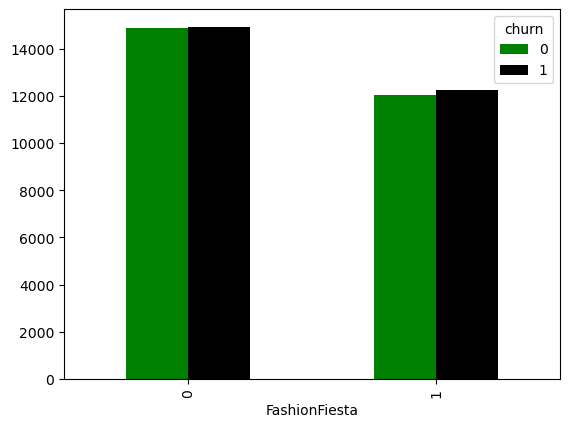

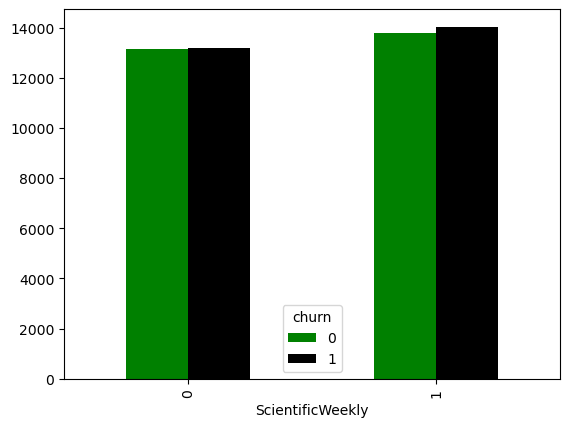

In [39]:
for x in rem_cols:
    crosstabs = pd.crosstab(user_train[x], user_train.churn)
    crosstabs.plot.bar(color=('green', 'black'))
    print(pd.crosstab(user_train[x].sort_values(ascending=False), user_train.churn))
    crosstabs2 = pd.crosstab(user_train[x], user_train.churn, normalize='index')
    print(crosstabs2.to_string())


In these graphs we see first that persons who have statrted out with a gift subscription ('GiftSuubscriptiion') or currently have a gift subscription ('CurrentGiftSubscription') are less likely to churn than their counterparts at a rate of 4% and 5% less respectively. We also find a severe imbalance of data between those customers who started out with or currently have a gift subscription
the other three graphs in respect to the specific magazines have no significant difference in churn rates except for the SportsDigest where those who have that subscription are 2% less likely to churn than those who don't have that subscription

In [40]:
plt.close()

print("Unique values:", user_train.Age.nunique())
print("Value Counts: ", user_train['Age'].value_counts())
print(user_train.Age.describe())

Unique values: 97
Value Counts:   34.0      1635
 33.0      1415
 24.0      1397
 23.0      1291
 29.0      1286
           ... 
-4182.0       1
 78.0         1
-20.0         1
-35.0         1
 85.0         1
Name: Age, Length: 97, dtype: int64
count    30891.000000
mean        32.177366
std         26.473540
min      -4182.000000
25%         25.000000
50%         31.000000
75%         38.000000
max         94.000000
Name: Age, dtype: float64


This column has 11,342 (approx. 21%) missing values and nonsensical positive and negative values. Because some of the values are extremme outliers  that may give an inadequate mean age, we will be replacing the missing values with the median age and possibly dropping this column as a feature due to its inaccuracies.

In [41]:
 user_train.Age = user_train.Age.fillna(user_train.Age.median())

In [42]:
user_train.isnull().sum()

State                      0
GiftSubscription           0
CurrentGiftSubscription    0
SportsDigest               0
FashionFiesta              0
ScientificWeekly           0
SiteViewsDays0_30          0
SiteViewsDays30_60         0
SiteViewsDays60_90         0
SiteSearchesDays0_30       0
SiteSearchesDays30_60      0
SiteSearchesDays60_90      0
HouseHoldIncome            0
CTR30                      0
OpenRate30                 0
RejectRate30               0
CTR30_60                   0
OpenRate30_60              0
RejectRate30_60            0
CTR60_90                   0
OpenRate60_90              0
RejectRate60_90            0
Area_Code                  0
Ratings0_90                0
SubscriptionCreatedAt      0
Age                        0
UserId                     0
churn                      0
dtype: int64

In [44]:
plt.close()

from collections import Counter


new_col = []
for x in user_train.SiteViewsDays0_30:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_siteViewsDays0_30'] = new_df 
print(len(user_train.new_siteViewsDays0_30))
print(*Counter(user_train.new_siteViewsDays0_30))
user_train.new_siteViewsDays0_30

54129
2 1 0


0        2
1        2
2        1
3        1
4        0
        ..
54124    0
54125    0
54126    1
54127    2
54128    2
Name: new_siteViewsDays0_30, Length: 54129, dtype: int64

churn                     0     1
new_siteViewsDays0_30            
0                      7987  8829
1                      9514  9720
2                      9424  8655
churn                         0         1
new_siteViewsDays0_30                    
0                      0.474964  0.525036
1                      0.494645  0.505355
2                      0.521268  0.478732


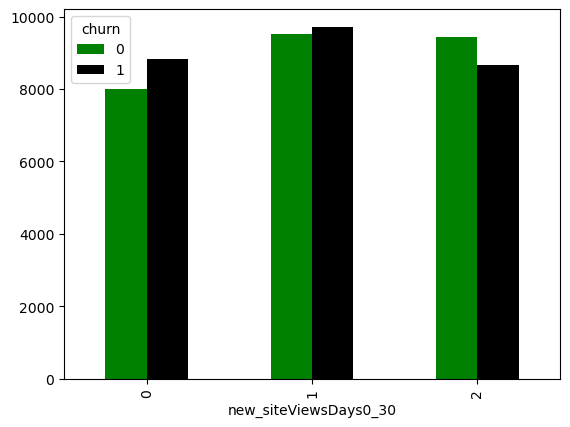

In [45]:
crossNewViewsDays0_30 = pd.crosstab(user_train.new_siteViewsDays0_30, user_train.churn)
crossNewViewsDays0_30.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_siteViewsDays0_30, user_train.churn))
crossNewViewsDays0_30_2 = pd.crosstab(user_train.new_siteViewsDays0_30, user_train.churn, normalize='index')
print(crossNewViewsDays0_30_2.to_string())


Upon first look at the original 'siteViewsDays0_30', because of the high cardinality of this variable. However when
the values are grouped into thirds it presents a different picture of the data where those customers that viewed the site more than .66 times in 30 days had an almost 3% and 5% less churn rate when compared to those customers who viewd the site within the same period '< 0.34' and'  0.33  >' but '< 0.67'.
We shall now move forward to transforming other variables of high cardinality in a similar fashion.


54129
1 2 0
churn                       0      1
new_siteViewsDays30_60              
0                        6699   7875
1                       12162  12305
2                        8064   7024
churn                          0         1
new_siteViewsDays30_60                    
0                       0.459654  0.540346
1                       0.497078  0.502922
2                       0.534464  0.465536


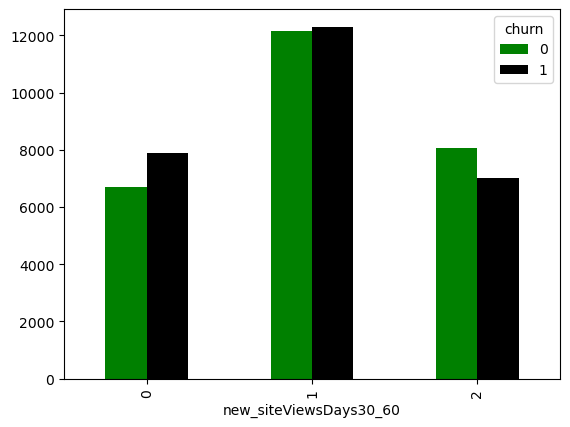

In [46]:
new_col = []
for x in user_train.SiteViewsDays30_60:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_siteViewsDays30_60'] = new_df 
print(len(user_train.new_siteViewsDays30_60))
print(*Counter(user_train.new_siteViewsDays30_60))
user_train.new_siteViewsDays30_60

crossNewViewsDays30_60 = pd.crosstab(user_train.new_siteViewsDays30_60, user_train.churn)
crossNewViewsDays30_60.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_siteViewsDays30_60, user_train.churn))
crossNewViewsDays30_60_2 = pd.crosstab(user_train.new_siteViewsDays30_60, user_train.churn, normalize='index')
print(crossNewViewsDays30_60_2.to_string())

54129
1 0 2
churn                       0      1
new_siteViewsDays60_90              
0                        5450   6607
1                       14066  14506
2                        7409   6091
churn                          0         1
new_siteViewsDays60_90                    
0                       0.452020  0.547980
1                       0.492300  0.507700
2                       0.548815  0.451185


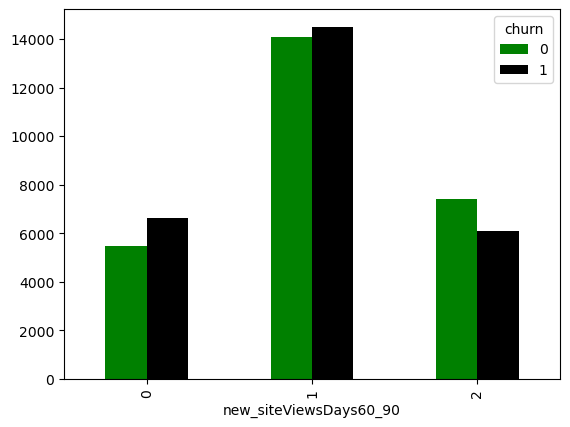

In [47]:
new_col = []
for x in user_train.SiteViewsDays60_90:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_siteViewsDays60_90'] = new_df 
print(len(user_train.new_siteViewsDays60_90))
print(*Counter(user_train.new_siteViewsDays60_90))
user_train.new_siteViewsDays60_90

crossNewViewsDays60_90 = pd.crosstab(user_train.new_siteViewsDays60_90, user_train.churn)
crossNewViewsDays60_90.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_siteViewsDays60_90, user_train.churn))
crossNewViewsDays60_90_2 = pd.crosstab(user_train.new_siteViewsDays60_90, user_train.churn, normalize='index')
print(crossNewViewsDays60_90_2.to_string())

54129
1 0 2
churn                         0      1
new_SiteSearchesDays0_30              
0                          7061   7373
1                         12613  12783
2                          7251   7048
churn                            0         1
new_SiteSearchesDays0_30                    
0                         0.489192  0.510808
1                         0.496653  0.503347
2                         0.507098  0.492902


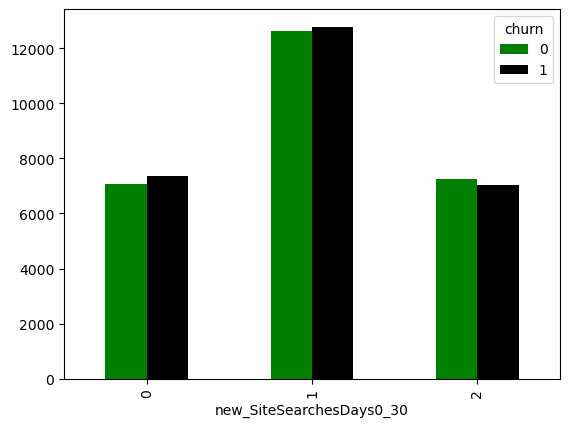

In [48]:
new_col = []
for x in user_train.SiteSearchesDays0_30:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_SiteSearchesDays0_30'] = new_df 
print(len(user_train.new_SiteSearchesDays0_30))
print(*Counter(user_train.new_SiteSearchesDays0_30))
user_train.new_SiteSearchesDays0_30

crossNewSiteSearchesDays0_30 = pd.crosstab(user_train.new_SiteSearchesDays0_30, user_train.churn)
crossNewSiteSearchesDays0_30.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_SiteSearchesDays0_30, user_train.churn))
crossNewSiteSearchesDays0_30_2 = pd.crosstab(user_train.new_SiteSearchesDays0_30, user_train.churn, normalize='index')
print(crossNewSiteSearchesDays0_30_2.to_string())

54129
1 0 2
churn                          0      1
new_SiteSearchesDays30_60              
0                           5817   6734
1                          14986  15136
2                           6122   5334
churn                             0         1
new_SiteSearchesDays30_60                    
0                          0.463469  0.536531
1                          0.497510  0.502490
2                          0.534392  0.465608


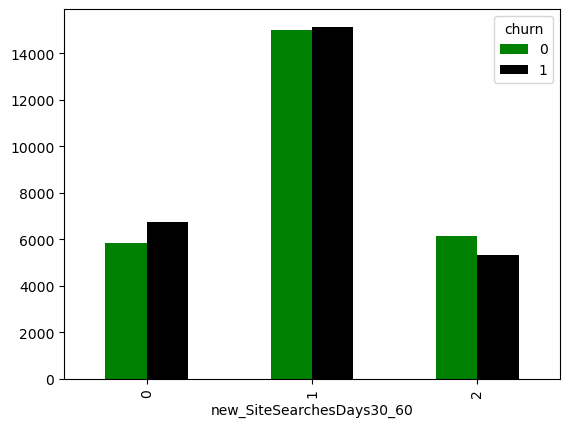

In [49]:
new_col = []
for x in user_train.SiteSearchesDays30_60:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_SiteSearchesDays30_60'] = new_df 
print(len(user_train.new_SiteSearchesDays30_60))
print(*Counter(user_train.new_SiteSearchesDays30_60))
user_train.new_SiteSearchesDays30_60

crossNewSiteSearchesDays30_60= pd.crosstab(user_train.new_SiteSearchesDays30_60, user_train.churn)
crossNewSiteSearchesDays30_60.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_SiteSearchesDays30_60, user_train.churn))
crossNewSiteSearchesDays30_60_2 = pd.crosstab(user_train.new_SiteSearchesDays30_60, user_train.churn, normalize='index')
print(crossNewSiteSearchesDays30_60_2.to_string())

54129
1 0 2
churn                          0      1
new_SiteSearchesDays60_90              
0                           5376   6447
1                          15716  15743
2                           5833   5014
churn                             0         1
new_SiteSearchesDays60_90                    
0                          0.454707  0.545293
1                          0.499571  0.500429
2                          0.537752  0.462248


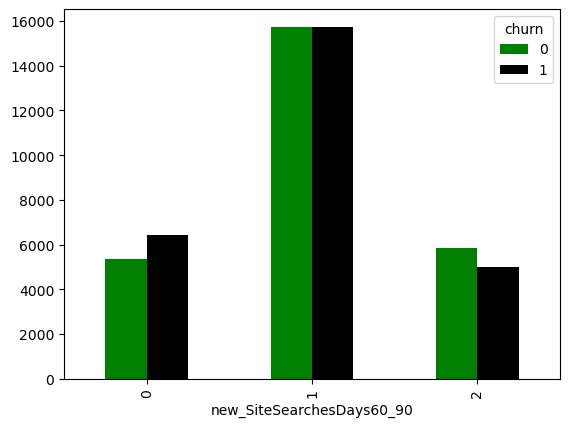

In [50]:
new_col = []
for x in user_train.SiteSearchesDays60_90:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_SiteSearchesDays60_90'] = new_df 
print(len(user_train.new_SiteSearchesDays60_90))
print(*Counter(user_train.new_SiteSearchesDays60_90))
user_train.new_SiteSearchesDays60_90

crossNewSiteSearchesDays60_90= pd.crosstab(user_train.new_SiteSearchesDays60_90, user_train.churn)
crossNewSiteSearchesDays60_90.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_SiteSearchesDays60_90, user_train.churn))
crossNewSiteSearchesDays60_90_2 = pd.crosstab(user_train.new_SiteSearchesDays60_90, user_train.churn, normalize='index')
print(crossNewSiteSearchesDays60_90_2.to_string())

54129
2 1 0
churn          0      1
new_CTR30              
0           7862   8165
1          10332  10268
2           8731   8771
churn             0         1
new_CTR30                    
0          0.490547  0.509453
1          0.501553  0.498447
2          0.498857  0.501143


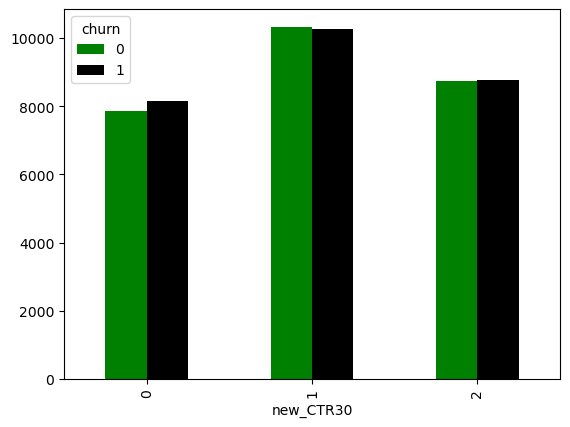

In [51]:
new_col = []
for x in user_train.CTR30:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_CTR30'] = new_df 
print(len(user_train.new_CTR30))
print(*Counter(user_train.new_CTR30))
user_train.new_CTR30

crossNewCTR30= pd.crosstab(user_train.new_CTR30, user_train.churn)
crossNewCTR30.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_CTR30, user_train.churn))
crossNewCTR30_2 = pd.crosstab(user_train.new_CTR30, user_train.churn, normalize='index')
print(crossNewCTR30_2.to_string())

54129
1 2 0
churn               0      1
new_OpenRate30              
0                6323   6500
1               14336  14318
2                6266   6386
churn                  0         1
new_OpenRate30                    
0               0.493098  0.506902
1               0.500314  0.499686
2               0.495258  0.504742


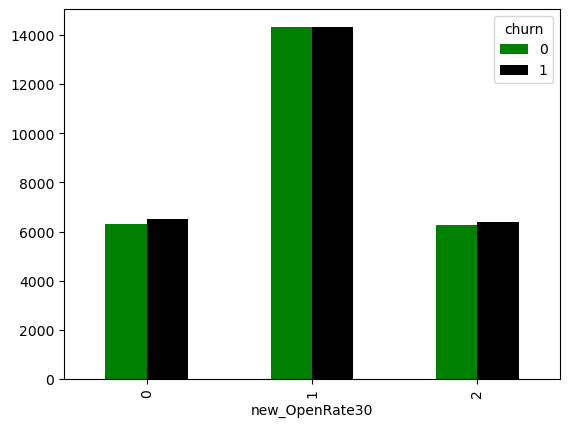

In [52]:
new_col = []
for x in user_train.OpenRate30:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_OpenRate30'] = new_df 
print(len(user_train.new_OpenRate30))
print(*Counter(user_train.new_OpenRate30))
user_train.new_OpenRate30

crossNewOpenRate30= pd.crosstab(user_train.new_OpenRate30, user_train.churn)
crossNewOpenRate30.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_OpenRate30, user_train.churn))
crossNewOpenRate30_2 = pd.crosstab(user_train.new_OpenRate30, user_train.churn, normalize='index')
print(crossNewOpenRate30_2.to_string())

54129
1 2 0
churn                 0      1
new_RejectRate30              
0                  8895   7483
1                 10653  10920
2                  7377   8801
churn                    0         1
new_RejectRate30                    
0                 0.543107  0.456893
1                 0.493812  0.506188
2                 0.455990  0.544010


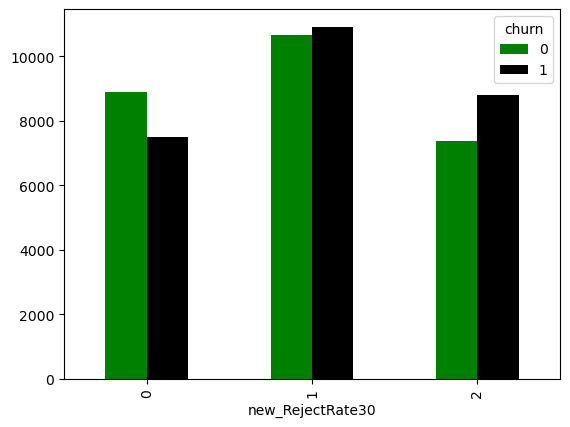

In [53]:
new_col = []
for x in user_train.RejectRate30:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_RejectRate30'] = new_df 
print(len(user_train.new_RejectRate30))
print(*Counter(user_train.new_RejectRate30))
user_train.new_RejectRate30

crossNewRejectRate30= pd.crosstab(user_train.new_RejectRate30, user_train.churn)
crossNewRejectRate30.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_RejectRate30, user_train.churn))
crossNewRejectRate30_2 = pd.crosstab(user_train.new_RejectRate30, user_train.churn, normalize='index')
print(crossNewRejectRate30_2.to_string())

54129
2 0 1
churn             0      1
new_CTR30_60              
0              6584   7570
1             12390  12691
2              7951   6943
churn                0         1
new_CTR30_60                    
0             0.465169  0.534831
1             0.493999  0.506001
2             0.533839  0.466161


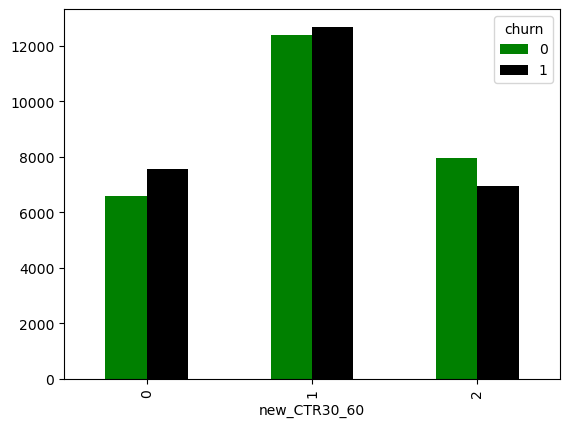

In [54]:
new_col = []
for x in user_train.CTR30_60:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_CTR30_60'] = new_df 
print(len(user_train.new_CTR30_60))
print(*Counter(user_train.new_CTR30_60))
user_train.new_CTR30_60

crossNewCTR30_60= pd.crosstab(user_train.new_CTR30_60, user_train.churn)
crossNewCTR30_60.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_CTR30_60, user_train.churn))
crossNewCTR30_60_2 = pd.crosstab(user_train.new_CTR30_60, user_train.churn, normalize='index')
print(crossNewCTR30_60_2.to_string())

54129
1 2 0
churn                  0      1
new_OpenRate30_60              
0                   4938   5661
1                  16333  16680
2                   5654   4863
churn                     0         1
new_OpenRate30_60                    
0                  0.465893  0.534107
1                  0.494744  0.505256
2                  0.537606  0.462394


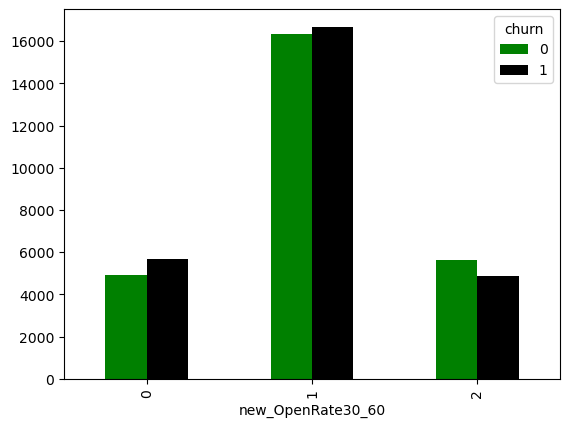

In [55]:
new_col = []
for x in user_train.OpenRate30_60:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_OpenRate30_60'] = new_df 
print(len(user_train.new_OpenRate30_60))
print(*Counter(user_train.new_OpenRate30_60))
user_train.new_OpenRate30_60

crossNewOpenRate30_60= pd.crosstab(user_train.new_OpenRate30_60, user_train.churn)
crossNewOpenRate30_60.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_OpenRate30_60, user_train.churn))
crossNewOpenRate30_60_2 = pd.crosstab(user_train.new_OpenRate30_60, user_train.churn, normalize='index')
print(crossNewOpenRate30_60_2.to_string())

54129
2 1 0
churn                   0     1
new_RejectRate30_60            
0                    9025  7940
1                    9490  9819
2                    8410  9445
churn                       0         1
new_RejectRate30_60                    
0                    0.531978  0.468022
1                    0.491481  0.508519
2                    0.471017  0.528983


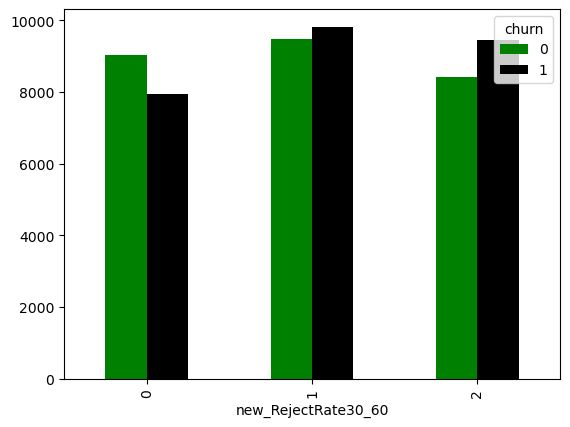

In [56]:
new_col = []
for x in user_train.RejectRate30_60:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_RejectRate30_60'] = new_df 
print(len(user_train.new_RejectRate30_60))
print(*Counter(user_train.new_RejectRate30_60))
user_train.new_RejectRate30_60

crossNewRejectRate30_60= pd.crosstab(user_train.new_RejectRate30_60, user_train.churn)
crossNewRejectRate30_60.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_RejectRate30_60, user_train.churn))
crossNewRejectRate30_60_2 = pd.crosstab(user_train.new_RejectRate30_60, user_train.churn, normalize='index')
print(crossNewRejectRate30_60_2.to_string())

54129
2 1 0
churn             0      1
new_CTR60_90              
0              5589   6865
1             13460  13612
2              7876   6727
churn                0         1
new_CTR60_90                    
0             0.448771  0.551229
1             0.497193  0.502807
2             0.539341  0.460659


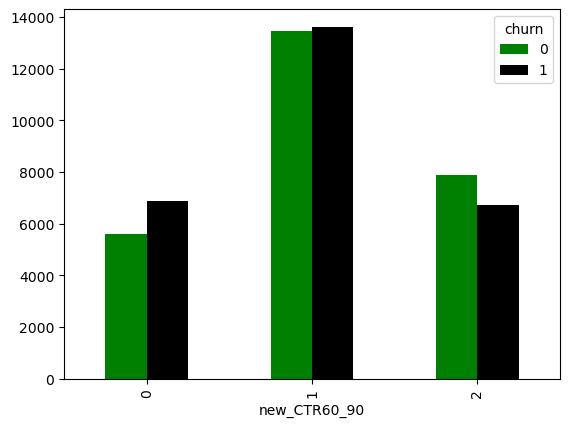

In [57]:
new_col = []
for x in user_train.CTR60_90:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_CTR60_90'] = new_df 
print(len(user_train.new_CTR60_90))
print(*Counter(user_train.new_CTR60_90))
user_train.new_CTR60_90

crossNewCTR60_90= pd.crosstab(user_train.new_CTR60_90, user_train.churn)
crossNewCTR60_90.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_CTR60_90, user_train.churn))
crossNewCTR60_90_2 = pd.crosstab(user_train.new_CTR60_90, user_train.churn, normalize='index')
print(crossNewCTR60_90_2.to_string())

54129
2 1 0
churn                  0      1
new_OpenRate60_90              
0                   4071   5336
1                  18391  18382
2                   4463   3486
churn                     0         1
new_OpenRate60_90                    
0                  0.432763  0.567237
1                  0.500122  0.499878
2                  0.561454  0.438546


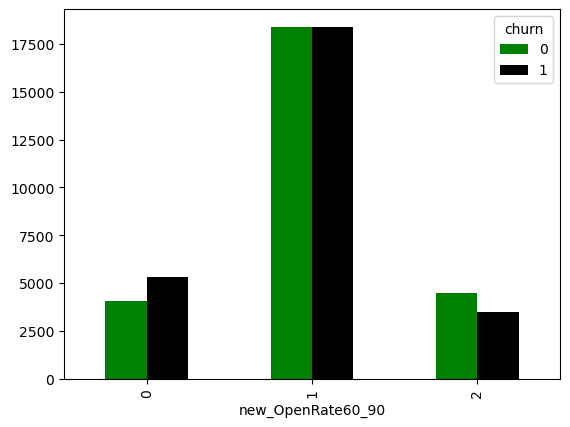

In [58]:
new_col = []
for x in user_train.OpenRate60_90:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_OpenRate60_90'] = new_df 
print(len(user_train.new_OpenRate60_90))
print(*Counter(user_train.new_OpenRate60_90))
user_train.new_OpenRate60_90

crossNewOpenRate60_90= pd.crosstab(user_train.new_OpenRate60_90, user_train.churn)
crossNewOpenRate60_90.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_OpenRate60_90, user_train.churn))
crossNewOpenRate60_90_2 = pd.crosstab(user_train.new_OpenRate60_90, user_train.churn, normalize='index')
print(crossNewOpenRate60_90_2.to_string())

54129
1 0 2
churn                   0      1
new_RejectRate60_90             
0                    8988   8095
1                    9861  10107
2                    8076   9002
churn                       0         1
new_RejectRate60_90                    
0                    0.526137  0.473863
1                    0.493840  0.506160
2                    0.472889  0.527111


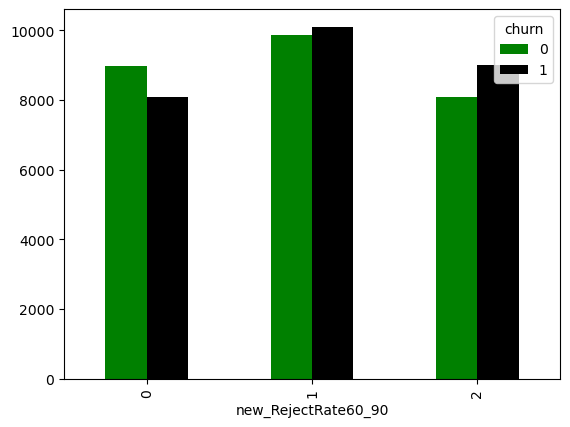

In [59]:
new_col = []
for x in user_train.RejectRate60_90:
    if x < 0.34:
        x = 0
    elif x > 0.66:
        x = 2
    else:
        x = 1
    new_col.append(x)

new_df = pd.DataFrame(new_col)
user_train['new_RejectRate60_90'] = new_df 
print(len(user_train.new_RejectRate60_90))
print(*Counter(user_train.new_RejectRate60_90))
user_train.new_RejectRate60_90

crossNewRejectRate60_90= pd.crosstab(user_train.new_RejectRate60_90, user_train.churn)
crossNewRejectRate60_90.plot.bar(color=('green', 'black'))
print(pd.crosstab(user_train.new_RejectRate60_90, user_train.churn))
crossNewRejectRate60_90_2 = pd.crosstab(user_train.new_RejectRate60_90, user_train.churn, normalize='index')
print(crossNewRejectRate60_90_2.to_string())

new_siteViewsDays60_90    0     1    2
State                                 
AA                        0     2    1
AB                        3    12    7
AE                        3    16    7
AK                       65   151   67
AL                       97   246  115
...                     ...   ...  ...
WA                      578  1348  606
WI                      355   782  364
WV                       45    99   42
WY                       45    79   46
YT                        1     0    0

[73 rows x 3 columns]


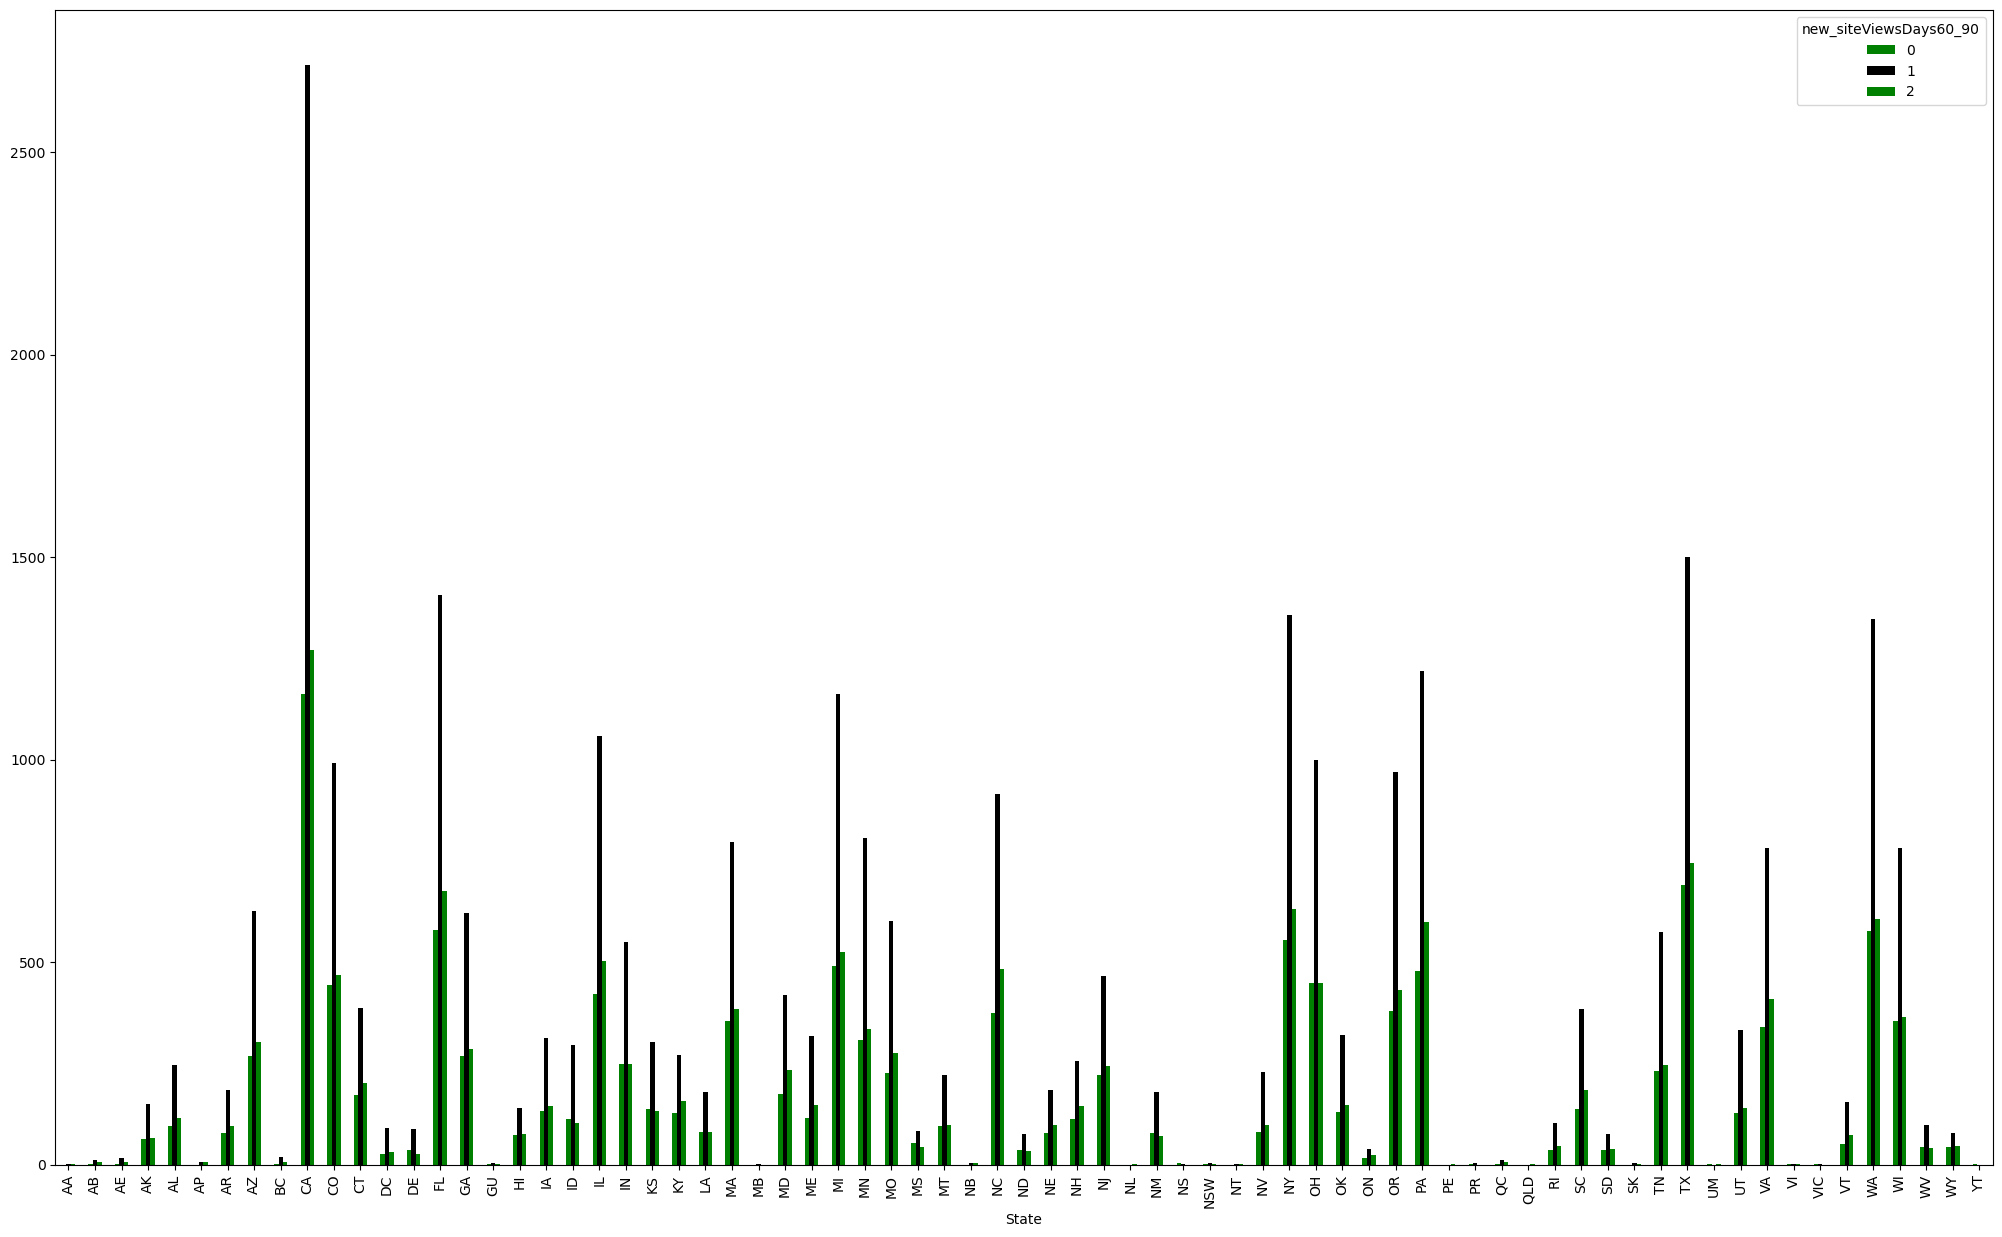

In [60]:
crossState_site30 = pd.crosstab(user_train.State, user_train.new_siteViewsDays60_90)
crossState_site30.plot.bar(figsize=(25,15), color=('green', 'black'))
print(pd.crosstab(user_train.State.sort_values(ascending=False), user_train.new_siteViewsDays60_90))

In [61]:
crossState_site60_2 = pd.crosstab(user_train.State, user_train.new_siteViewsDays60_90, normalize='index')
print(crossState_site60_2.to_string())

new_siteViewsDays60_90         0         1         2
State                                               
AA                      0.000000  0.666667  0.333333
AB                      0.136364  0.545455  0.318182
AE                      0.115385  0.615385  0.269231
AK                      0.229682  0.533569  0.236749
AL                      0.211790  0.537118  0.251092
AP                      0.000000  0.500000  0.500000
AR                      0.219444  0.513889  0.266667
AZ                      0.223520  0.523770  0.252711
BC                      0.103448  0.655172  0.241379
CA                      0.225719  0.527584  0.246698
CO                      0.233473  0.520462  0.246065
CT                      0.226737  0.508519  0.264744
DC                      0.182432  0.608108  0.209459
DE                      0.235294  0.581699  0.183007
FL                      0.218093  0.527778  0.254129
GA                      0.228547  0.527613  0.243840
GU                      0.142857  0.571429  0.

2.	In the BOOKVISTA Orders table, find the 10 UserIds that have placed the most orders and list them. What is the total value of these users’ BOOKVISTAOrders purchases (excluding promotions received)? How many additional purchases have these ten users made (refer to BOOKVISTA Additions to answer this question)? (Use this as an opportunity to think about how orders and additions could help you predict churn.)

In [62]:
print(orders.UserId.value_counts().head(10).to_string())

u'53383    379
u'75193    215
u'75617    183
u'20231    154
u'24177    147
u'49380    147
u'27366    137
u'79560    137
u'5011     136
u'80737    133


find out how many unique variables in the order dataset

In [64]:
unique_order_variables = orders.nunique()
print('Unique Order Values:')
unique_order_variables

Unique Order Values:


UserId              79174
OrderId            400068
TotalPromotions       475
OrderCreatedAt     390270
OrderValue          10043
ItemValue            8945
NoItems                41
dtype: int64

We see that there are 79174 unique UserId. To merge the information on this dataset with user_train data we need to find the userIds in both datasets that are alike 

## Feature Engineering and Selection

In [65]:
orders.UserId

0         u'26632
1         u'67279
2         u'18294
3          u'2319
4         u'26528
           ...   
527061    u'23782
527062     u'2117
527063    u'80645
527064     u'3282
527065    u'15644
Name: UserId, Length: 527066, dtype: object

In [66]:
user_train.UserId

0        u'51229
1        u'41237
2        u'77737
3        u'28690
4        u'73354
          ...   
54124     u'6266
54125    u'54887
54126    u'76821
54127      u'861
54128    u'15796
Name: UserId, Length: 54129, dtype: object

Create new dataframes to work with. To accomplish this merge. First, Create new dataframes to work with. Then, sort each dataset by UserId column. Next, create new columns consisting of the sums of the ItemValue, OrderValue, and NoItems columns associated with each User Id. This will give us a single row entry for each unique User Id to use in our newly merged dataset. For total promotions we will create two new columns. The first being the  dollar sum of all promotions, and the second the sum of how many promotions given in total.

In [67]:
n_orders = orders
n_user_train = user_train

In [68]:
n_orders = n_orders.sort_values(by=['UserId'])
n_orders.UserId

179816       u'1
260429      u'10
476844      u'10
329209      u'10
340744      u'10
           ...  
237362    u'9999
526727    u'9999
127437    u'9999
273542    u'9999
63026     u'9999
Name: UserId, Length: 527066, dtype: object

In [69]:
n_additions = additions
n_additions = n_additions.sort_values(by=['UserId'])
n_additions.UserId

151842       u'10
151843       u'10
109441      u'100
160669     u'1000
113156    u'10000
           ...   
65495      u'9999
65494      u'9999
65493      u'9999
65497      u'9999
65496      u'9999
Name: UserId, Length: 167826, dtype: object

In [70]:
n_user_train = n_user_train.sort_values(by=['UserId'])
n_user_train.UserId

5680         u'1
12024       u'10
12187      u'100
35449    u'10000
31443    u'10001
          ...   
3081      u'9993
31592     u'9994
26771     u'9996
20921     u'9997
20325     u'9998
Name: UserId, Length: 54129, dtype: object

In [71]:
# remove characters from user ID
new_UserId = []
for x in n_user_train.UserId:
    x = x.removeprefix("u'")
    # x = int(x)
    new_UserId.append(x)
    
n_user_train['new_UserId'] = new_UserId
n_user_train.new_UserId

5680         1
12024       10
12187      100
35449    10000
31443    10001
         ...  
3081      9993
31592     9994
26771     9996
20921     9997
20325     9998
Name: new_UserId, Length: 54129, dtype: object

In [72]:
n_user_train.new_UserId.info

<bound method Series.info of 5680         1
12024       10
12187      100
35449    10000
31443    10001
         ...  
3081      9993
31592     9994
26771     9996
20921     9997
20325     9998
Name: new_UserId, Length: 54129, dtype: object>

In [73]:
# remove characters from user ID

new_OrderId = []
for x in n_orders.UserId:
    x = x.removeprefix("u'")
    # x = int(x)
    new_OrderId.append(x)
    
n_orders['new_OrderId'] = new_OrderId
n_orders.new_OrderId

179816       1
260429      10
476844      10
329209      10
340744      10
          ... 
237362    9999
526727    9999
127437    9999
273542    9999
63026     9999
Name: new_OrderId, Length: 527066, dtype: object

In [74]:
uID = n_user_train['new_UserId'].to_numpy().tolist()

#for column in uID:
 #   print(column)

In [75]:
# Create dataframe for new columns
newCols = pd.DataFrame(columns=['sumTotalPromotions', 'sumOrderValue', 'sumItemvalue', 'sumNoItems', 'countTotalPromotions'])

# Create numpy vectorization for iteration of pandas UserIdcolumn
uID = n_user_train['new_UserId'].to_numpy().tolist()


for column in uID:
    subframe = n_orders[n_orders['new_OrderId'] == column]
    # subframe = n_orders.query('new_OrderId == "column"')
    # TotalPromotions sum
    tpSum = subframe['TotalPromotions'].sum()
    # OrderValue sum
    ovSum = subframe['OrderValue'].sum()
    # ItemValue sum
    ivSum = subframe['ItemValue'].sum()
    # NoItems sum
    niSum = subframe['NoItems'].sum()
    # Count nonzero values of TotalPromotions
    countTP = (subframe['TotalPromotions'] != 0).sum()

    newCols.loc[len(newCols.index)] = [tpSum, ovSum, ivSum, niSum, countTP]  


In [76]:
newCols

,sumTotalPromotions,sumOrderValue,sumItemvalue,sumNoItems,countTotalPromotions
0,-9.0,26.00,35.00,1.0,1.0
1,0.0,207.46,204.50,9.0,0.0
2,-7.0,57.31,64.31,2.0,1.0
3,-9.0,742.91,751.91,28.0,1.0
4,-7.0,780.58,778.60,28.0,1.0
...,...,...,...,...,...
54124,-5.0,1246.38,1188.03,55.0,1.0
54125,-7.0,487.31,481.98,17.0,1.0
54126,-9.0,618.39,604.94,38.0,1.0
54127,-10.0,464.06,474.06,16.0,1.0


In [77]:
newCols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54129 entries, 0 to 54128
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sumTotalPromotions    54129 non-null  float64
 1   sumOrderValue         54129 non-null  float64
 2   sumItemvalue          54129 non-null  float64
 3   sumNoItems            54129 non-null  float64
 4   countTotalPromotions  54129 non-null  float64
dtypes: float64(5)
memory usage: 2.5 MB


In [78]:
n_user_train = pd.concat([n_user_train, newCols], axis=1, join='inner')

In [79]:
n_user_train.new_siteViewsDays60_90

5680     1
12024    1
12187    1
35449    1
31443    1
        ..
3081     2
31592    0
26771    2
20921    0
20325    0
Name: new_siteViewsDays60_90, Length: 54129, dtype: int64

In [80]:
n_user_train.head().T

,5680,12024,12187,35449,31443
State,SC,WA,NH,TX,CA
GiftSubscription,1,1,0,0,0
CurrentGiftSubscription,1,1,0,0,0
SportsDigest,0,1,0,1,1
FashionFiesta,0,0,1,1,0
ScientificWeekly,0,1,1,1,1
SiteViewsDays0_30,0.389901,0.195764,0.047186,0.815998,0.75584
SiteViewsDays30_60,0.141176,0.314997,0.598954,0.705959,0.444142
SiteViewsDays60_90,0.484973,0.425087,0.456195,0.340936,0.585939
SiteSearchesDays0_30,0.460866,0.684913,0.19547,0.26579,0.707498


In [81]:
n_user_train.isnull().sum()

State                        0
GiftSubscription             0
CurrentGiftSubscription      0
SportsDigest                 0
FashionFiesta                0
ScientificWeekly             0
SiteViewsDays0_30            0
SiteViewsDays30_60           0
SiteViewsDays60_90           0
SiteSearchesDays0_30         0
SiteSearchesDays30_60        0
SiteSearchesDays60_90        0
HouseHoldIncome              0
CTR30                        0
OpenRate30                   0
RejectRate30                 0
CTR30_60                     0
OpenRate30_60                0
RejectRate30_60              0
CTR60_90                     0
OpenRate60_90                0
RejectRate60_90              0
Area_Code                    0
Ratings0_90                  0
SubscriptionCreatedAt        0
Age                          0
UserId                       0
churn                        0
new_siteViewsDays0_30        0
new_siteViewsDays30_60       0
new_siteViewsDays60_90       0
new_SiteSearchesDays0_30     0
new_Site

In [82]:
# remove Timezone Charachters 'UTC" from timestamp
new_userDate = []
for x in n_user_train.SubscriptionCreatedAt:
    x = x.removesuffix("UTC")
    # x = int(x)
    new_userDate.append(x)
    
n_user_train['CreatedDate'] = new_userDate
n_user_train.CreatedDate

5680     2018-01-01 13:37:13.317 
12024    2019-01-09 18:06:56.521 
12187    2018-04-19 21:39:08.676 
35449    2018-02-21 20:44:18.784 
31443    2018-03-12 18:17:33.607 
                   ...           
3081     2018-09-30 23:24:30.829 
31592    2018-10-09 13:14:15.198 
26771    2018-02-03 18:33:52.654 
20921    2018-08-17 15:14:33.329 
20325    2018-08-03 03:36:22.487 
Name: CreatedDate, Length: 54129, dtype: object

In [83]:
# turn timestamp to datetime and remove time  and day from date

n_user_train['CreatedDate'] = pd.to_datetime(n_user_train['CreatedDate'])

n_user_train['CreatedDate'] = n_user_train['CreatedDate'].dt.strftime('%Y-%m')
n_user_train['CreatedDate']

5680     2018-01
12024    2019-01
12187    2018-04
35449    2018-02
31443    2018-03
          ...   
3081     2018-09
31592    2018-10
26771    2018-02
20921    2018-08
20325    2018-08
Name: CreatedDate, Length: 54129, dtype: object

In [84]:
# remove characters from user ID

new_AdditionsId = []
for x in n_additions.UserId:
    x = x.removeprefix("u'")
    # x = int(x)
    new_AdditionsId.append(x)
    
n_additions['new_AdditionsId'] = new_AdditionsId
n_additions.new_AdditionsId

151842       10
151843       10
109441      100
160669     1000
113156    10000
          ...  
65495      9999
65494      9999
65493      9999
65497      9999
65496      9999
Name: new_AdditionsId, Length: 167826, dtype: object

In [85]:
# Dropping old UserId column

n_additions = n_additions.drop(['UserId'], axis='columns')
n_additions

,AdditionCreatedAt,new_AdditionsId
151842,2019-01-29 20:47:47.026 UTC,10
151843,2019-03-10 14:48:08.232 UTC,10
109441,2018-04-19 23:47:39.784 UTC,100
160669,2018-08-08 21:08:41.236 UTC,1000
113156,2018-06-22 12:44:36.645 UTC,10000
...,...,...
65495,2019-02-22 00:38:34.19 UTC,9999
65494,2019-02-22 00:33:11.446 UTC,9999
65493,2019-02-22 00:39:08.256 UTC,9999
65497,2019-02-22 00:28:07.829 UTC,9999


In [86]:
n_additions.isnull().sum()

AdditionCreatedAt    0
new_AdditionsId      0
dtype: int64

In [87]:
n_additions.describe()

,AdditionCreatedAt,new_AdditionsId
count,167826,167826
unique,167826,30265
top,2019-01-29 20:47:47.026 UTC,20231
freq,1,459


In [88]:
# remove Timezone Charachters 'UTC" from timestamp
new_Date = []
for x in n_additions.AdditionCreatedAt:
    x = x.removesuffix("UTC")
    # x = int(x)
    new_Date.append(x)
    
n_additions['CreatedDate'] = new_Date
n_additions.CreatedDate

151842    2019-01-29 20:47:47.026 
151843    2019-03-10 14:48:08.232 
109441    2018-04-19 23:47:39.784 
160669    2018-08-08 21:08:41.236 
113156    2018-06-22 12:44:36.645 
                    ...           
65495      2019-02-22 00:38:34.19 
65494     2019-02-22 00:33:11.446 
65493     2019-02-22 00:39:08.256 
65497     2019-02-22 00:28:07.829 
65496     2019-02-22 00:27:39.945 
Name: CreatedDate, Length: 167826, dtype: object

In [89]:
# turn timestamp to datetime and remove time from date

n_additions['CreatedDate'] = pd.to_datetime(n_additions['CreatedDate'])

n_additions['CreatedDate'] = n_additions['CreatedDate'].dt.date
n_additions = n_additions.drop(['AdditionCreatedAt'], axis='columns')
n_additions

,new_AdditionsId,CreatedDate
151842,10,2019-01-29
151843,10,2019-03-10
109441,100,2018-04-19
160669,1000,2018-08-08
113156,10000,2018-06-22
...,...,...
65495,9999,2019-02-22
65494,9999,2019-02-22
65493,9999,2019-02-22
65497,9999,2019-02-22


In [90]:
# Remove day from datetime
n_additions['CreatedDate'] =  pd.to_datetime(n_additions['CreatedDate'])
n_additions['CreatedDate'] = n_additions['CreatedDate'].dt.strftime('%Y-%m')
n_additions

,new_AdditionsId,CreatedDate
151842,10,2019-01
151843,10,2019-03
109441,100,2018-04
160669,1000,2018-08
113156,10000,2018-06
...,...,...
65495,9999,2019-02
65494,9999,2019-02
65493,9999,2019-02
65497,9999,2019-02


In [91]:
n_additions.describe()

,new_AdditionsId,CreatedDate
count,167826,167826
unique,30265,28
top,20231,2019-04
freq,459,15440


In [92]:
n_additions['CreatedDate'].value_counts()

2019-04    15440
2019-03    15009
2019-05    13521
2019-01    13393
2019-02    12960
2018-11    10327
2018-10    10267
2018-08    10092
2018-09     9677
2018-12     9314
2018-07     9210
2018-05     7011
2018-04     6788
2018-06     6775
2018-03     5606
2019-06     4842
2018-02     4335
2018-01     3146
2017-11       17
2017-09       16
2017-12       15
2017-04       14
2017-10       13
2017-05       13
2017-03       11
2017-07        7
2017-08        4
2017-06        3
Name: CreatedDate, dtype: int64

In [93]:
df = pd.DataFrame({'date': ['1998-01']})

df['date'] = pd.to_datetime(df['date'])
timestamp = df.date.dt.strftime('%Y-%m')
timestamp

0    1998-01
Name: date, dtype: object

In [94]:
#df.groupby('state').mean(numeric_only=True)
n_additions1 = n_additions.groupby('new_AdditionsId')
n_additions1

In [95]:
print(n_additions1)

In [96]:
# Create column showing number of additions for each listed userId and date of last addition made by each user

# Create dataframe for new columns
newColsAdd = pd.DataFrame(columns=['NumAdditions', 'LastAdd'])

# Create numpy vectorization for iteration of pandas UserIdcolumn
#uID = n_user_train['new_UserId'].to_numpy().tolist()


for column in uID:
    subframe = n_additions[n_additions['new_AdditionsId'] == column]
    # subframe = n_orders.query('new_AdditionsId == "column"')
    # Additions sum
    addSum = (subframe['CreatedDate'] != 0).sum()
    # last addition/ latest timestamp for user id
    lastAdd = subframe['CreatedDate'].max()
    
    newColsAdd.loc[len(newColsAdd.index)] = [addSum, lastAdd]  


In [97]:
newColsAdd.head(20)

,NumAdditions,LastAdd
0,0.0,NaN
1,2.0,2019-03
2,1.0,2018-04
3,5.0,2018-08
4,5.0,2019-03
5,0.0,NaN
6,1.0,2019-01
7,5.0,2019-03
8,1.0,2019-01
9,1.0,2019-02


In [98]:
n_user_train = pd.concat([n_user_train, newColsAdd], axis=1, join='inner')

In [99]:
n_user_train.head().T

,5680,12024,12187,35449,31443
State,SC,WA,NH,TX,CA
GiftSubscription,1,1,0,0,0
CurrentGiftSubscription,1,1,0,0,0
SportsDigest,0,1,0,1,1
FashionFiesta,0,0,1,1,0
ScientificWeekly,0,1,1,1,1
SiteViewsDays0_30,0.389901,0.195764,0.047186,0.815998,0.75584
SiteViewsDays30_60,0.141176,0.314997,0.598954,0.705959,0.444142
SiteViewsDays60_90,0.484973,0.425087,0.456195,0.340936,0.585939
SiteSearchesDays0_30,0.460866,0.684913,0.19547,0.26579,0.707498


These were used solely for evaluating the features, however the scaled data of the original feature will be used in the model and thus these alternates are being removed

In [100]:
n_user_train = n_user_train.drop(['new_siteViewsDays0_30'], axis=1)
n_user_train = n_user_train.drop(['new_siteViewsDays30_60'], axis=1)
n_user_train = n_user_train.drop(['new_siteViewsDays60_90'], axis=1)
n_user_train = n_user_train.drop(['new_SiteSearchesDays0_30'], axis=1)
n_user_train = n_user_train.drop(['new_SiteSearchesDays30_60'], axis=1)
n_user_train = n_user_train.drop(['new_SiteSearchesDays60_90'], axis=1)
n_user_train = n_user_train.drop(['new_CTR30'], axis=1)
n_user_train = n_user_train.drop(['new_OpenRate30'], axis=1)
n_user_train = n_user_train.drop(['new_RejectRate30'], axis=1)
n_user_train = n_user_train.drop(['new_CTR60_90'], axis=1)
n_user_train = n_user_train.drop(['new_OpenRate60_90'], axis=1)
n_user_train = n_user_train.drop(['new_RejectRate60_90'], axis=1)
n_user_train = n_user_train.drop(['new_CTR30_60'], axis=1)
n_user_train = n_user_train.drop(['new_OpenRate30_60'], axis=1)
n_user_train = n_user_train.drop(['new_RejectRate30_60'], axis=1)

n_user_train.head().T

,5680,12024,12187,35449,31443
State,SC,WA,NH,TX,CA
GiftSubscription,1,1,0,0,0
CurrentGiftSubscription,1,1,0,0,0
SportsDigest,0,1,0,1,1
FashionFiesta,0,0,1,1,0
ScientificWeekly,0,1,1,1,1
SiteViewsDays0_30,0.389901,0.195764,0.047186,0.815998,0.75584
SiteViewsDays30_60,0.141176,0.314997,0.598954,0.705959,0.444142
SiteViewsDays60_90,0.484973,0.425087,0.456195,0.340936,0.585939
SiteSearchesDays0_30,0.460866,0.684913,0.19547,0.26579,0.707498


In [101]:
dict_list = n_user_train.to_dict('records')
for item in dict_list:
    if item['NumAdditions'] == 0.0:
        item['LastAdd'] = item['CreatedDate']
    #else:
        #item['LastAdd'] = item['LastAdd']

n_user_train1 = pd.DataFrame.from_dict(dict_list)

In [102]:
n_user_train1.head().T

,0,1,2,3,4
State,SC,WA,NH,TX,CA
GiftSubscription,1,1,0,0,0
CurrentGiftSubscription,1,1,0,0,0
SportsDigest,0,1,0,1,1
FashionFiesta,0,0,1,1,0
ScientificWeekly,0,1,1,1,1
SiteViewsDays0_30,0.389901,0.195764,0.047186,0.815998,0.75584
SiteViewsDays30_60,0.141176,0.314997,0.598954,0.705959,0.444142
SiteViewsDays60_90,0.484973,0.425087,0.456195,0.340936,0.585939
SiteSearchesDays0_30,0.460866,0.684913,0.19547,0.26579,0.707498


In [105]:
n_user_trainer = n_user_train1

Dropping features that add no value to the model 'State' is also dropped as it incereases dimensionality unnecessarily if encoded and thus will increse the noise of the model. Additionally in an alternative iteration of this model it was run with one-hot encoding of state and the respective outcome of that model showed no benefit from its inclusion.

In [106]:
n_user_trainer.drop(['UserId'], axis=1, inplace=True)
n_user_trainer.drop(['new_UserId'], axis=1, inplace=True)
n_user_trainer.drop(['churn'], axis=1, inplace=True)
n_user_trainer.drop(['Area_Code'], axis=1, inplace=True)
n_user_trainer.drop(['SubscriptionCreatedAt'], axis=1, inplace=True)
n_user_trainer.drop(['State'], axis=1, inplace=True)

n_user_trainer

,GiftSubscription,CurrentGiftSubscription,SportsDigest,FashionFiesta,ScientificWeekly,SiteViewsDays0_30,SiteViewsDays30_60,SiteViewsDays60_90,SiteSearchesDays0_30,SiteSearchesDays30_60,...,Ratings0_90,Age,sumTotalPromotions,sumOrderValue,sumItemvalue,sumNoItems,countTotalPromotions,CreatedDate,NumAdditions,LastAdd
0,1,1,0,0,0,0.389901,0.141176,0.484973,0.460866,0.381906,...,0,31.0,-9.0,165.83,172.16,7.0,1.0,2018-01,4.0,2019-01
1,1,1,1,0,1,0.195764,0.314997,0.425087,0.684913,0.429990,...,1,32.0,-8.0,28.00,36.00,1.0,1.0,2019-01,0.0,2019-01
2,0,0,0,1,1,0.047186,0.598954,0.456195,0.195470,0.444151,...,0,31.0,0.0,0.00,0.00,0.0,0.0,2018-04,0.0,2018-04
3,0,0,1,1,1,0.815998,0.705959,0.340936,0.265790,0.276335,...,0,29.0,-10.0,131.00,141.00,4.0,1.0,2018-02,2.0,2019-05
4,0,0,1,0,1,0.755840,0.444142,0.585939,0.707498,0.622314,...,0,21.0,-9.0,61.00,70.00,2.0,1.0,2018-03,0.0,2018-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54124,0,0,0,0,1,0.836682,0.853527,0.867776,0.878440,0.546910,...,0,28.0,-9.0,26.00,35.00,1.0,1.0,2018-09,0.0,2018-09
54125,1,1,0,1,1,0.887086,0.487864,0.276702,0.466033,0.300432,...,0,29.0,-5.0,30.00,35.00,1.0,1.0,2018-10,0.0,2018-10
54126,0,0,0,1,1,0.508836,0.681421,0.767455,0.284099,0.387811,...,0,20.0,-7.0,28.15,35.00,1.0,1.0,2018-02,1.0,2019-05
54127,0,0,1,0,0,0.364746,0.196658,0.276716,0.321387,0.584602,...,0,31.0,-7.0,172.70,176.00,5.0,1.0,2018-08,0.0,2018-08


In [107]:
n_user_trainer.head().T

,0,1,2,3,4
GiftSubscription,1,1,0,0,0
CurrentGiftSubscription,1,1,0,0,0
SportsDigest,0,1,0,1,1
FashionFiesta,0,0,1,1,0
ScientificWeekly,0,1,1,1,1
SiteViewsDays0_30,0.389901,0.195764,0.047186,0.815998,0.75584
SiteViewsDays30_60,0.141176,0.314997,0.598954,0.705959,0.444142
SiteViewsDays60_90,0.484973,0.425087,0.456195,0.340936,0.585939
SiteSearchesDays0_30,0.460866,0.684913,0.19547,0.26579,0.707498
SiteSearchesDays30_60,0.381906,0.42999,0.444151,0.276335,0.622314


In [108]:
n_user_trainer.NumAdditions.nunique()

107

In [109]:
n_user_trainer.NumAdditions.describe()

count    54129.000000
mean         2.067616
std          6.200680
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        302.000000
Name: NumAdditions, dtype: float64

churn             0      1
NumAdditions              
0.0           16803  17011
1.0            2905   3053
2.0            1770   1808
3.0            1197   1128
4.0             802    823
...             ...    ...
176.0             0      1
200.0             1      0
220.0             0      1
262.0             1      0
302.0             1      0

[107 rows x 2 columns]
churn                0         1
NumAdditions                    
0.0           0.496924  0.503076
1.0           0.487580  0.512420
2.0           0.494690  0.505310
3.0           0.514839  0.485161
4.0           0.493538  0.506462
5.0           0.495840  0.504160
6.0           0.500544  0.499456
7.0           0.533046  0.466954
8.0           0.500818  0.499182
9.0           0.486607  0.513393
10.0          0.479381  0.520619
11.0          0.493197  0.506803
12.0          0.512727  0.487273
13.0          0.507692  0.492308
14.0          0.508287  0.491713
15.0          0.534392  0.465608
16.0          0.514286  0.48571

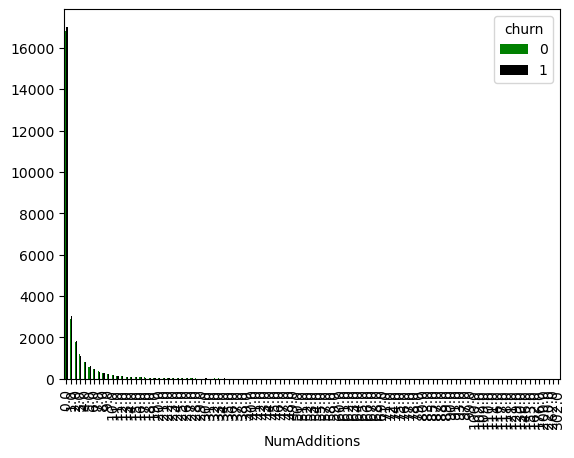

In [110]:
crossAdds = pd.crosstab(n_user_trainer.NumAdditions, user_train.churn)
crossAdds.plot.bar(color=('green', 'black'))
print(pd.crosstab(n_user_trainer.NumAdditions, user_train.churn))
crossAdds_2 = pd.crosstab(n_user_trainer.NumAdditions, user_train.churn, normalize='index')
print(crossAdds_2.to_string())


churn             0     1
sumOrderValue            
0.00            515   547
25.00           780   830
26.00          1234  1279
26.03             3     2
26.04             3     8
...             ...   ...
24499.10          0     1
29112.41          1     0
31305.72          0     1
43985.48          0     1
55671.19          1     0

[21264 rows x 2 columns]
churn                 0         1
sumOrderValue                    
0.00           0.484934  0.515066
25.00          0.484472  0.515528
26.00          0.491047  0.508953
26.03          0.600000  0.400000
26.04          0.272727  0.727273
26.05          0.629630  0.370370
26.06          0.514286  0.485714
26.07          0.520833  0.479167
26.08          0.508197  0.491803
26.09          0.475610  0.524390
26.10          0.572289  0.427711
26.11          1.000000  0.000000
26.26          0.000000  1.000000
27.00          0.333333  0.666667
27.16          1.000000  0.000000
27.99          0.484848  0.515152
28.00          0.488610 

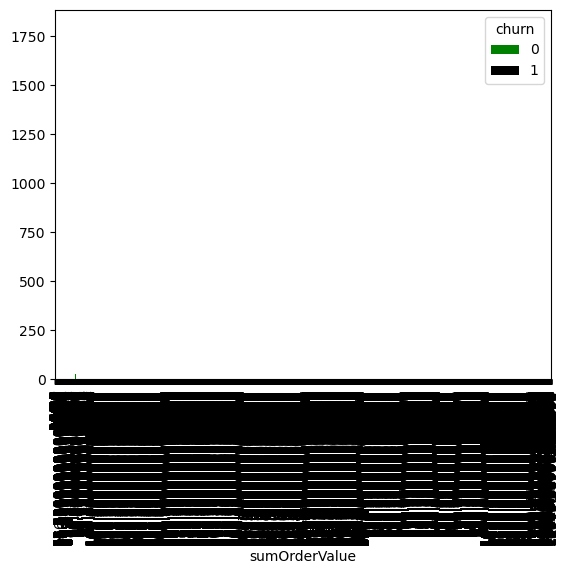

In [111]:
crossOrderValue = pd.crosstab(n_user_trainer.sumOrderValue, user_train.churn)
crossOrderValue.plot.bar(color=('green', 'black'))
print(pd.crosstab(n_user_trainer.sumOrderValue, user_train.churn))
crossOrderValue_2 = pd.crosstab(n_user_trainer.sumOrderValue, user_train.churn, normalize='index')
print(crossOrderValue_2.to_string())

In [112]:
n_user_trainer.sumOrderValue.nunique()

21264

In [113]:
n_user_trainer.sumOrderValue.describe()

count    54129.000000
mean       310.724448
std        693.047699
min          0.000000
25%         60.570000
50%        149.000000
75%        364.820000
max      55671.190000
Name: sumOrderValue, dtype: float64

2.	In the BOOKVISTA Orders table, find the 10 UserIds that have placed the most orders and list them. What is the total value of these users’ BOOKVISTAOrders purchases (excluding promotions received)? How many additional purchases have these ten users made (refer to BOOKVISTA Additions to answer this question)? (Use this as an opportunity to think about how orders and additions could help you predict churn.)

In [114]:
print(n_orders.new_OrderId.value_counts().head(10).to_string())

53383    379
75193    215
75617    183
20231    154
49380    147
24177    147
27366    137
79560    137
5011     136
80737    133


In [115]:
n_user_trainer.sumNoItems.describe()

count    54129.000000
mean        13.555026
std         44.872932
min          0.000000
25%          2.000000
50%          5.000000
75%         12.000000
max       4351.000000
Name: sumNoItems, dtype: float64

In [116]:
n_user_trainer.sumNoItems.nunique()

400

In [117]:
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [118]:
# Function to perform statistical test on numerical variables to determine whether to reject or accept H0
def num_stats(num_col):
    group_0 = n_user_train[n_user_train['churn']==0][num_col]
    group_1 = n_user_train[n_user_train['churn']==1][num_col]

    _, p_value = stats.ttest_ind(group_0,group_1,equal_var=False)

    print('P-value : ', p_value)
    if(p_value<0.05):
        print('Reject null hypothesis')
    else:
        print('Do not reject null hypotheis')
      

In [123]:
num_col_list = ['GiftSubscription', 'CurrentGiftSubscription', 'SportsDigest', 'FashionFiesta', 'ScientificWeekly',
                'SiteViewsDays0_30', 'SiteViewsDays30_60', 'SiteViewsDays60_90', 'SiteSearchesDays0_30',
                'SiteSearchesDays30_60', 'SiteSearchesDays60_90', 'CTR30', 'OpenRate30', 'RejectRate30',
                'CTR30_60', 'OpenRate30_60', 'RejectRate30_60', 'CTR60_90', 'OpenRate60_90', 
                'RejectRate60_90', 'Ratings0_90', 'Age','sumTotalPromotions', 'sumOrderValue', 'sumItemvalue', 'sumNoItems', 
                'countTotalPromotions', 'NumAdditions']

In [125]:
# display p-values of feautures

for col in num_col_list:
    print('Column Name : ', col)
    num_stats(col)
    print('---------------------------------------------')

Column Name :  GiftSubscription
P-value :  1.2946956633885412e-11
Reject null hypothesis
---------------------------------------------
Column Name :  CurrentGiftSubscription
P-value :  2.6527099816704663e-17
Reject null hypothesis
---------------------------------------------
Column Name :  SportsDigest
P-value :  4.52054369519671e-05
Reject null hypothesis
---------------------------------------------
Column Name :  FashionFiesta
P-value :  0.384270464922282
Do not reject null hypotheis
---------------------------------------------
Column Name :  ScientificWeekly
P-value :  0.3113625867276248
Do not reject null hypotheis
---------------------------------------------
Column Name :  SiteViewsDays0_30
P-value :  8.703586842335592e-20
Reject null hypothesis
---------------------------------------------
Column Name :  SiteViewsDays30_60
P-value :  1.2435343716221399e-50
Reject null hypothesis
---------------------------------------------
Column Name :  SiteViewsDays60_90
P-value :  5.82542

In [126]:
# Split the training and test set
X = n_user_trainer
y = n_user_train.churn

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [129]:
X_train.LastAdd = pd.to_datetime(X_train.LastAdd)
X_test.LastAdd = pd.to_datetime(X_test.LastAdd)
X_train.CreatedDate = pd.to_datetime(X_train.CreatedDate)
X_test.CreatedDate = pd.to_datetime(X_test.CreatedDate)


In [130]:
X_train['lastDateYear'] = X_train.LastAdd.dt.year
X_train['lastDateMonth'] = X_train.LastAdd.dt.month
X_test['lastDateYear'] = X_test.LastAdd.dt.year
X_test['lastDateMonth'] = X_test.LastAdd.dt.month
X_train['CreatedDateYear'] = X_train.CreatedDate.dt.year
X_train['CreatedDateMonth'] = X_train.CreatedDate.dt.month
X_test['CreatedDateYear'] = X_test.CreatedDate.dt.year
X_test['CreatedDateMonth'] = X_test.CreatedDate.dt.month


print(X_train.lastDateYear.head())
print(X_train.lastDateMonth.head())
print(X_test.lastDateYear.head())
print(X_test.lastDateMonth.head())
print(X_train.CreatedDateYear.head())
print(X_train.CreatedDateMonth.head())
print(X_test.CreatedDateYear.head())
print(X_test.CreatedDateMonth.head())

X_train = X_train.drop(['LastAdd'], axis=1)
X_test = X_test.drop(['LastAdd'], axis=1)
X_train = X_train.drop(['CreatedDate'], axis=1,)
X_test = X_test.drop(['CreatedDate'], axis=1)



53613    2018
43475    2018
42117    2018
27400    2018
30210    2019
Name: lastDateYear, dtype: int64
53613    7
43475    2
42117    6
27400    1
30210    3
Name: lastDateMonth, dtype: int64
30809    2018
19366    2019
48616    2018
37854    2018
8441     2019
Name: lastDateYear, dtype: int64
30809     5
19366     2
48616     5
37854    11
8441      2
Name: lastDateMonth, dtype: int64
53613    2018
43475    2018
42117    2018
27400    2018
30210    2019
Name: CreatedDateYear, dtype: int64
53613    7
43475    2
42117    6
27400    1
30210    3
Name: CreatedDateMonth, dtype: int64
30809    2018
19366    2019
48616    2018
37854    2018
8441     2019
Name: CreatedDateYear, dtype: int64
30809     5
19366     2
48616     5
37854    11
8441      2
Name: CreatedDateMonth, dtype: int64


In [132]:
X_train_encoded = X_train
X_test_encoded = X_test



In [133]:
X_train_encoded.columns.to_list()

['GiftSubscription',
 'CurrentGiftSubscription',
 'SportsDigest',
 'FashionFiesta',
 'ScientificWeekly',
 'SiteViewsDays0_30',
 'SiteViewsDays30_60',
 'SiteViewsDays60_90',
 'SiteSearchesDays0_30',
 'SiteSearchesDays30_60',
 'SiteSearchesDays60_90',
 'HouseHoldIncome',
 'CTR30',
 'OpenRate30',
 'RejectRate30',
 'CTR30_60',
 'OpenRate30_60',
 'RejectRate30_60',
 'CTR60_90',
 'OpenRate60_90',
 'RejectRate60_90',
 'Ratings0_90',
 'Age',
 'sumTotalPromotions',
 'sumOrderValue',
 'sumItemvalue',
 'sumNoItems',
 'countTotalPromotions',
 'NumAdditions',
 'lastDateYear',
 'lastDateMonth',
 'CreatedDateYear',
 'CreatedDateMonth']

In [147]:
X_train_encoded.lastDateYear = pd.to_datetime(X_train_encoded.lastDateYear)
X_test_encoded.lastDateYear = pd.to_datetime(X_test_encoded.lastDateYear)
X_train_encoded.lastDateMonth = pd.to_datetime(X_train_encoded.lastDateMonth)
X_test_encoded.lastDateMonth = pd.to_datetime(X_test_encoded.lastDateMonth)
X_train_encoded.CreatedDateYear = pd.to_datetime(X_train_encoded.CreatedDateYear)
X_test_encoded.CreatedDateYear = pd.to_datetime(X_test_encoded.CreatedDateYear)
X_train_encoded.CreatedDateMonth = pd.to_datetime(X_train_encoded.CreatedDateMonth)
X_test_encoded.CreatedDateMonth = pd.to_datetime(X_test_encoded.CreatedDateMonth)


In [148]:


X_train_encoded['lastDateYear'] = X_train_encoded.lastDateYear.dt.year
X_train_encoded['lastDateMonth'] = X_train_encoded.lastDateMonth.dt.month
X_test_encoded['lastDateYear'] = X_test_encoded.lastDateYear.dt.year
X_test_encoded['lastDateMonth'] = X_test_encoded.lastDateMonth.dt.month
X_train_encoded['CreatedDateYear'] = X_train_encoded.CreatedDateYear.dt.year
X_train_encoded['CreatedDateMonth'] = X_train_encoded.CreatedDateMonth.dt.month
X_test_encoded['CreatedDateYear'] = X_test_encoded.CreatedDateYear.dt.year
X_test_encoded['CreatedDateMonth'] = X_test_encoded.CreatedDateMonth.dt.month


print(X_train_encoded.lastDateYear.head())
print(X_train_encoded.lastDateMonth.head())
print(X_test_encoded.lastDateYear.head())
print(X_test_encoded.lastDateMonth.head())
print(X_train_encoded.CreatedDateYear.head())
print(X_train_encoded.CreatedDateMonth.head())
print(X_test_encoded.CreatedDateYear.head())
print(X_test_encoded.CreatedDateMonth.head())




53613    1970
43475    1970
42117    1970
27400    1970
30210    1970
Name: lastDateYear, dtype: int64
53613    1
43475    1
42117    1
27400    1
30210    1
Name: lastDateMonth, dtype: int64
30809    1970
19366    1970
48616    1970
37854    1970
8441     1970
Name: lastDateYear, dtype: int64
30809    1
19366    1
48616    1
37854    1
8441     1
Name: lastDateMonth, dtype: int64
53613    1970
43475    1970
42117    1970
27400    1970
30210    1970
Name: CreatedDateYear, dtype: int64
53613    1
43475    1
42117    1
27400    1
30210    1
Name: CreatedDateMonth, dtype: int64
30809    1970
19366    1970
48616    1970
37854    1970
8441     1970
Name: CreatedDateYear, dtype: int64
30809    1
19366    1
48616    1
37854    1
8441     1
Name: CreatedDateMonth, dtype: int64


In [146]:
X_train_encoded.columns.to_list()

['GiftSubscription',
 'CurrentGiftSubscription',
 'SportsDigest',
 'FashionFiesta',
 'ScientificWeekly',
 'SiteViewsDays0_30',
 'SiteViewsDays30_60',
 'SiteViewsDays60_90',
 'SiteSearchesDays0_30',
 'SiteSearchesDays30_60',
 'SiteSearchesDays60_90',
 'HouseHoldIncome',
 'CTR30',
 'OpenRate30',
 'RejectRate30',
 'CTR30_60',
 'OpenRate30_60',
 'RejectRate30_60',
 'CTR60_90',
 'OpenRate60_90',
 'RejectRate60_90',
 'Ratings0_90',
 'Age',
 'sumTotalPromotions',
 'sumOrderValue',
 'sumItemvalue',
 'sumNoItems',
 'countTotalPromotions',
 'NumAdditions',
 'lastDateYear',
 'lastDateMonth',
 'CreatedDateYear',
 'CreatedDateMonth']

In [149]:
print(X_train_encoded.count())

GiftSubscription           37890
CurrentGiftSubscription    37890
SportsDigest               37890
FashionFiesta              37890
ScientificWeekly           37890
SiteViewsDays0_30          37890
SiteViewsDays30_60         37890
SiteViewsDays60_90         37890
SiteSearchesDays0_30       37890
SiteSearchesDays30_60      37890
SiteSearchesDays60_90      37890
HouseHoldIncome            37890
CTR30                      37890
OpenRate30                 37890
RejectRate30               37890
CTR30_60                   37890
OpenRate30_60              37890
RejectRate30_60            37890
CTR60_90                   37890
OpenRate60_90              37890
RejectRate60_90            37890
Ratings0_90                37890
Age                        37890
sumTotalPromotions         37890
sumOrderValue              37890
sumItemvalue               37890
sumNoItems                 37890
countTotalPromotions       37890
NumAdditions               37890
lastDateYear               37890
lastDateMo

In [150]:
# Create reusable function to create prediction models and print their performance

# Confusion Matrix Function
def confusion_matrix_plot(y_test, y_pred):
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    #plt.grid(b=None)
    plt.show()

In [151]:
# Create Logistic Regression Model
def get_lr_model(y_train, X_train_encoded, X_test_encoded):
    model = LogisticRegression(max_iter=100000000)
    model.fit(X_train_encoded,y_train)
    arr = np.c_[X_train_encoded.columns.tolist(), model.coef_[0]]
    intercept = model.intercept_[0]
    print('n\Printing model coefficients and intercept summary for sklearn model,:\n', arr, model.intercept_)
    y_pred = model.predict(X_test_encoded)
    print('\nPrinting predicted and actual values:\n', np.c_[y_pred, y_test])
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Accuracy Scores:\n', accuracy_score(y_test, y_pred))
    print('Classification Report:\n',classification_report(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred)
    return model, arr, intercept

#Create AUC chart and print AUC score.
def roc(model, X_test_encoded, y_test):
    probs = model.predict_proba(X_test_encoded)
    fpr, tpr, _ = roc_curve(y_test, probs[:,1])
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="upper right")
    plt.show()
    print('AUC: %.3f' %roc_auc_score(y_test, probs[:,1]))

def roc_multi(models, X_test_encoded, y_test):
    for model in models:
        probs = models[model].predict_proba(X_test_encoded)
        fpr, tpr, _ = roc_curve(y_test, probs[:,1])
        plt.plot(fpr, tpr, marker='.', label=model)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="upper right")
    plt.show()
    

                                

In [152]:
#X_train_encoded.columns = X_train_encoded.columns.astype(str)
X_train_encoded= X_train_encoded.rename(str,axis="columns") 
X_test_encoded= X_test_encoded.rename(str,axis="columns") 


In [153]:
#X_train_encoded.isnull().any()
X_train_encoded.columns[X_train_encoded.isna().any()].tolist()


[]

n\Printing model coefficients and intercept summary for sklearn model,:
 [['GiftSubscription' '-0.1679976558289628']
 ['CurrentGiftSubscription' '-0.2101753067594862']
 ['SportsDigest' '-0.15822524516815611']
 ['FashionFiesta' '0.04938865024029497']
 ['ScientificWeekly' '0.03053554074546854']
 ['SiteViewsDays0_30' '-0.18474292024935557']
 ['SiteViewsDays30_60' '-0.2667261686998151']
 ['SiteViewsDays60_90' '-0.24320485815884801']
 ['SiteSearchesDays0_30' '-0.06652127510320184']
 ['SiteSearchesDays30_60' '-0.18198940920958528']
 ['SiteSearchesDays60_90' '-0.18990204583931783']
 ['HouseHoldIncome' '-0.0021181382939298565']
 ['CTR30' '-0.02663129848820047']
 ['OpenRate30' '-0.01455784153946069']
 ['RejectRate30' '0.3201901324887928']
 ['CTR30_60' '-0.21850269008431836']
 ['OpenRate30_60' '-0.14712714523973902']
 ['RejectRate30_60' '0.24098811770226958']
 ['CTR60_90' '-0.2594686570963771']
 ['OpenRate60_90' '-0.22244790925059685']
 ['RejectRate60_90' '0.2017582446532446']
 ['Ratings0_90' '0

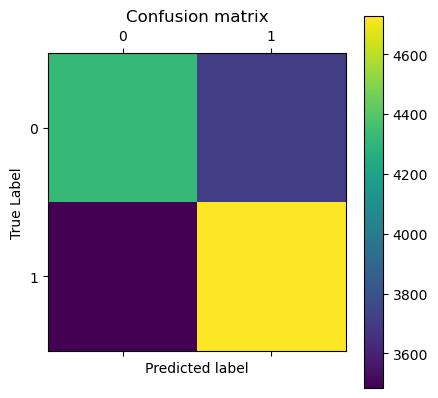

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


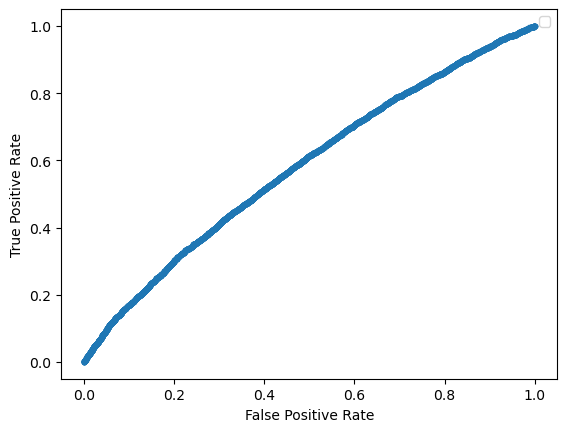

AUC: 0.581


In [154]:
# Run logistic regression model
model_lr, arr, intercept = get_lr_model(y_train, X_train_encoded, X_test_encoded)
roc(model_lr, X_test_encoded, y_test)

In [155]:
X_test_encoded.columns.to_list()

['GiftSubscription',
 'CurrentGiftSubscription',
 'SportsDigest',
 'FashionFiesta',
 'ScientificWeekly',
 'SiteViewsDays0_30',
 'SiteViewsDays30_60',
 'SiteViewsDays60_90',
 'SiteSearchesDays0_30',
 'SiteSearchesDays30_60',
 'SiteSearchesDays60_90',
 'HouseHoldIncome',
 'CTR30',
 'OpenRate30',
 'RejectRate30',
 'CTR30_60',
 'OpenRate30_60',
 'RejectRate30_60',
 'CTR60_90',
 'OpenRate60_90',
 'RejectRate60_90',
 'Ratings0_90',
 'Age',
 'sumTotalPromotions',
 'sumOrderValue',
 'sumItemvalue',
 'sumNoItems',
 'countTotalPromotions',
 'NumAdditions',
 'lastDateYear',
 'lastDateMonth',
 'CreatedDateYear',
 'CreatedDateMonth']

In [156]:
y_train

21137    0
39294    1
32816    1
34928    1
19164    0
        ..
37877    1
23819    0
33051    1
32329    0
33925    0
Name: churn, Length: 37890, dtype: int64

In [157]:


# Create pipeline
pipe = Pipeline(
    steps=[('rfc', RandomForestClassifier())])

# Declare rfc hyperparameters distribution
param_dist ={'rfc__n_estimators': [100,200,300,500,700,800,1000],
             'rfc__criterion': ['entropy', 'gini'],
             'rfc__min_samples_split': [2,3,4,5,7,8,9,10],
             'rfc__min_samples_leaf': [1,2,3,4,5],
             'rfc__max_features': ['sqrt', 'log2'],
             'rfc__max_depth':[1,2,3,4,5,6,7],
             'rfc__random_state': [42],
             'rfc__bootstrap': [True, False]
                    }
# Though not severe in any particular category, Because we are using a RandomForest
# classifier, we will address the several data imbalances in this dataset 
# with the ensemble method of StratifiedKFold
kf = StratifiedKFold()

# Create RandomizedSearchCV and find optimal hyperparameters for rfc
rs = RandomizedSearchCV(estimator=pipe, 
                        param_distributions=param_dist,
                        n_iter=100,
                        cv=kf,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=2,
                   )
# Fit rs to training data
rs.fit(X_train_encoded, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('rfc',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'rfc__bootstrap': [True, False],
                                        'rfc__criterion': ['entropy', 'gini'],
                                        'rfc__max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'rfc__max_features': ['sqrt', 'log2'],
                                        'rfc__min_samples_leaf': [1, 2, 3, 4,
                                                                  5],
                                        'rfc__min_samples_split': [2, 3, 4, 5,
                                                                   7, 8, 9,
                                                                   10],
                                        'rfc__n_estimators': [100, 200, 300,
                                                              500, 700, 800,
                                                              1000],
                                        'rfc__random_state': [42]},
                   scoring='accuracy', verbose=2)

In [158]:
# View the best hyperparameters
best_params = rs.best_params_
best_params

{'rfc__random_state': 42,
 'rfc__n_estimators': 500,
 'rfc__min_samples_split': 4,
 'rfc__min_samples_leaf': 1,
 'rfc__max_features': 'log2',
 'rfc__max_depth': 7,
 'rfc__criterion': 'gini',
 'rfc__bootstrap': True}

In [159]:
# View the best score
best_score = rs.best_score_
best_score

0.5622327790973871

In [160]:
# View score from test set
test_set_score = rs.score(X_test_encoded, y_test)
test_set_score

0.5595172116509637

In [162]:
X_test_encoded.head().T

,30809,19366,48616,37854,8441
GiftSubscription,1.000000,0.000000,0.000000,1.000000,0.000000
CurrentGiftSubscription,1.000000,0.000000,0.000000,1.000000,0.000000
SportsDigest,0.000000,1.000000,0.000000,1.000000,1.000000
FashionFiesta,1.000000,1.000000,0.000000,0.000000,0.000000
ScientificWeekly,1.000000,0.000000,0.000000,0.000000,0.000000
SiteViewsDays0_30,0.887151,0.085299,0.521092,0.257622,0.509619
SiteViewsDays30_60,0.558539,0.738920,0.455257,0.749616,0.378999
SiteViewsDays60_90,0.470726,0.626116,0.296389,0.488649,0.331881
SiteSearchesDays0_30,0.848113,0.658379,0.464495,0.543346,0.285912
SiteSearchesDays30_60,0.787852,0.603364,0.503519,0.613251,0.553806


In [163]:
# number of features seen in rs
num_features = rs.n_features_in_
num_features

33

In [164]:
#Names of features seen in rs
feature_names = rs.feature_names_in_
feature_names

array(['GiftSubscription', 'CurrentGiftSubscription', 'SportsDigest',
       'FashionFiesta', 'ScientificWeekly', 'SiteViewsDays0_30',
       'SiteViewsDays30_60', 'SiteViewsDays60_90', 'SiteSearchesDays0_30',
       'SiteSearchesDays30_60', 'SiteSearchesDays60_90',
       'HouseHoldIncome', 'CTR30', 'OpenRate30', 'RejectRate30',
       'CTR30_60', 'OpenRate30_60', 'RejectRate30_60', 'CTR60_90',
       'OpenRate60_90', 'RejectRate60_90', 'Ratings0_90', 'Age',
       'sumTotalPromotions', 'sumOrderValue', 'sumItemvalue',
       'sumNoItems', 'countTotalPromotions', 'NumAdditions',
       'lastDateYear', 'lastDateMonth', 'CreatedDateYear',
       'CreatedDateMonth'], dtype=object)


Printing predicted and actual values:
 [[1 0]
 [0 0]
 [1 1]
 ...
 [1 0]
 [1 1]
 [0 0]]
Confusion Matrix:
 [[4424 3603]
 [3584 4628]]
Accuracy Scores:
 0.5574234866678983
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55      8027
           1       0.56      0.56      0.56      8212

    accuracy                           0.56     16239
   macro avg       0.56      0.56      0.56     16239
weighted avg       0.56      0.56      0.56     16239



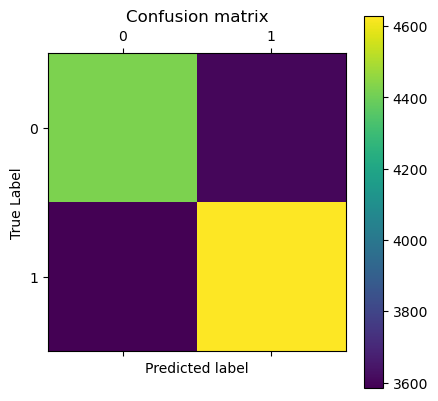

[CV] END rfc__bootstrap=False, rfc__criterion=gini, rfc__max_depth=5, rfc__max_features=log2, rfc__min_samples_leaf=4, rfc__min_samples_split=3, rfc__n_estimators=800, rfc__random_state=42; total time=  40.6s
[CV] END rfc__bootstrap=False, rfc__criterion=gini, rfc__max_depth=2, rfc__max_features=sqrt, rfc__min_samples_leaf=4, rfc__min_samples_split=8, rfc__n_estimators=500, rfc__random_state=42; total time=  11.2s
[CV] END rfc__bootstrap=False, rfc__criterion=gini, rfc__max_depth=2, rfc__max_features=log2, rfc__min_samples_leaf=5, rfc__min_samples_split=3, rfc__n_estimators=500, rfc__random_state=42; total time=  11.7s
[CV] END rfc__bootstrap=True, rfc__criterion=entropy, rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=4, rfc__min_samples_split=9, rfc__n_estimators=1000, rfc__random_state=42; total time=  54.2s
[CV] END rfc__bootstrap=True, rfc__criterion=entropy, rfc__max_depth=7, rfc__max_features=log2, rfc__min_samples_leaf=5, rfc__min_samples_split=8, rfc__n_estimat

In [165]:
rscv = Pipeline(
     steps=[('rfc',RandomForestClassifier(random_state=42, n_estimators=500,
                                    min_samples_split=8,
                                         min_samples_leaf=5,
                                         max_features='sqrt',
                                         max_depth=7,
                                         criterion='gini',
                                         bootstrap=True))])
rscv.fit(X_train_encoded, y_train) # fit the model
y_pred2 = rscv.predict(X_test_encoded)

print('\nPrinting predicted and actual values:\n', np.c_[y_pred2, y_test])
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred2))
print('Accuracy Scores:\n', accuracy_score(y_test, y_pred2))
print('Classification Report:\n',classification_report(y_test, y_pred2))
confusion_matrix_plot(y_test, y_pred2)

In [166]:
# Find customers that have spent the most money
keepers = pd.DataFrame(n_user_train[['sumOrderValue', 'new_UserId']])

# Find customers that have received the most promtions
receivers = pd.DataFrame(n_user_train[['countTotalPromotions', 'new_UserId']])

In [167]:
keepers.head().T

,5680,12024,12187,35449,31443
sumOrderValue,165.83,28.0,0.0,131.0,61.0
new_UserId,1,10,100,10000,10001


In [168]:
receivers.head().T

,5680,12024,12187,35449,31443
countTotalPromotions,1.0,1.0,0.0,1.0,1.0
new_UserId,1,10,100,10000,10001


In [169]:
keepers.sort_values(by=['sumOrderValue'], ascending=False)
#df.sort_values(by=['Country'])
keepers = pd.DataFrame(keepers.sort_values(by=['sumOrderValue'], ascending=False))
keepers.head(100)

,sumOrderValue,new_UserId
32287,55671.19,9202
48829,43985.48,39662
52420,31305.72,51887
45423,29112.41,27589
48502,24499.10,28308
...,...,...
45595,5633.34,12003
10800,5577.06,55643
53,5512.83,65765
8411,5508.98,73147


[CV] END rfc__bootstrap=False, rfc__criterion=entropy, rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=100, rfc__random_state=42; total time=   5.0s
[CV] END rfc__bootstrap=False, rfc__criterion=gini, rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=4, rfc__min_samples_split=3, rfc__n_estimators=700, rfc__random_state=42; total time=  29.0s
[CV] END rfc__bootstrap=False, rfc__criterion=entropy, rfc__max_depth=4, rfc__max_features=log2, rfc__min_samples_leaf=3, rfc__min_samples_split=9, rfc__n_estimators=700, rfc__random_state=42; total time=  34.8s
[CV] END rfc__bootstrap=False, rfc__criterion=gini, rfc__max_depth=2, rfc__max_features=log2, rfc__min_samples_leaf=5, rfc__min_samples_split=2, rfc__n_estimators=800, rfc__random_state=42; total time=  18.9s
[CV] END rfc__bootstrap=False, rfc__criterion=entropy, rfc__max_depth=2, rfc__max_features=log2, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_es

In [170]:
pd.set_option('display.max_rows', 100)
keepers.head(100)

,sumOrderValue,new_UserId
32287,55671.19,9202
48829,43985.48,39662
52420,31305.72,51887
45423,29112.41,27589
48502,24499.10,28308
16631,19556.96,36975
26511,18030.67,8824
47480,17378.88,68360
13024,17158.43,60257
11234,15945.22,55374


In [171]:
keepers.head(100).to_clipboard(excel=True)

In [172]:

keepers.head(100).to_excel('keepers.xlsx', index=False)


In [173]:
adders = pd.DataFrame(n_user_train.NumAdditions)
adders.head()

,NumAdditions
5680,4.0
12024,0.0
12187,0.0
35449,2.0
31443,0.0


In [174]:
adders.to_excel('adders.xlsx', index=False)


In [175]:
receivers.to_excel('receivers.xlsx', index=False)


churn             0     1
sumOrderValue            
0.00            510   552
25.00           821   789
26.00          1232  1281
26.03             3     2
26.04             5     6
...             ...   ...
24499.10          0     1
29112.41          0     1
31305.72          0     1
43985.48          0     1
55671.19          0     1

[21264 rows x 2 columns]
churn                 0         1
sumOrderValue                    
0.00           0.480226  0.519774
25.00          0.509938  0.490062
26.00          0.490251  0.509749
26.03          0.600000  0.400000
26.04          0.454545  0.545455
26.05          0.537037  0.462963
26.06          0.558730  0.441270
26.07          0.504167  0.495833
26.08          0.500000  0.500000
26.09          0.560976  0.439024
26.10          0.500000  0.500000
26.11          0.000000  1.000000
26.26          1.000000  0.000000
27.00          0.333333  0.666667
27.16          1.000000  0.000000
27.99          0.484848  0.515152
28.00          0.503417 

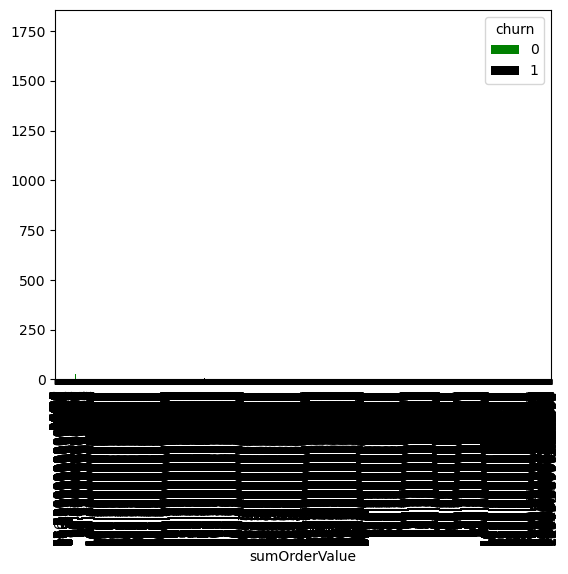

In [176]:
crossOValue = pd.crosstab(n_user_train.sumOrderValue, user_train.churn)
crossOValue.plot.bar(color=('green', 'black'))
print(pd.crosstab(n_user_train.sumOrderValue.sort_values(ascending=False), user_train.churn))
crossOValue_2 = pd.crosstab(n_user_train.sumOrderValue, user_train.churn, normalize='index')

print(crossOValue_2.to_string())

In [177]:
# create copy of user_test
n_user_test = user_test
n_user_test = n_user_test.sort_values(by=['UserId'])
n_user_test.UserId


24048     u'1000
10082    u'10006
24063    u'10009
18069     u'1001
23614    u'10010
          ...   
25608     u'9988
24851      u'999
17764     u'9992
7811      u'9995
11439     u'9999
Name: UserId, Length: 26662, dtype: object

In [198]:
# logistic regression predictions
y_pred = model_lr.predict(X_test_encoded)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [199]:
# Random Forest Predictions
y_pred2 = rscv.predict(X_test_encoded)
y_pred2

array([1, 0, 1, ..., 1, 1, 0])

In [200]:
lrpredictions = pd.DataFrame(y_pred)
lrpredictions['predictions'] = lrpredictions
lrpredictions = lrpredictions['predictions']
lrpredictions

0        0
1        0
2        1
3        0
4        1
        ..
16234    0
16235    1
16236    1
16237    1
16238    1
Name: predictions, Length: 16239, dtype: int64

In [201]:
testuserids = pd.DataFrame(n_user_test.UserId)
testuserids

,UserId
24048,u'1000
10082,u'10006
24063,u'10009
18069,u'1001
23614,u'10010
...,...
25608,u'9988
24851,u'999
17764,u'9992
7811,u'9995


In [202]:
testUserPreds = pd.concat([testuserids, lrpredictions], axis=1, join='inner')
testUserPreds

,UserId,predictions
10082,u'10006,1
9185,u'10017,1
15695,u'1002,0
4742,u'10021,1
672,u'10022,0
...,...,...
6915,u'9982,0
1431,u'9986,0
15613,u'9987,1
7811,u'9995,0


In [203]:
testUserPreds.to_csv('testUserPreds.csv',index=False)


In [204]:
newdf = X_test_encoded

In [205]:
newdf

,GiftSubscription,CurrentGiftSubscription,SportsDigest,FashionFiesta,ScientificWeekly,SiteViewsDays0_30,SiteViewsDays30_60,SiteViewsDays60_90,SiteSearchesDays0_30,SiteSearchesDays30_60,...,sumTotalPromotions,sumOrderValue,sumItemvalue,sumNoItems,countTotalPromotions,NumAdditions,lastDateYear,lastDateMonth,CreatedDateYear,CreatedDateMonth
30809,1,1,0,1,1,0.887151,0.558539,0.470726,0.848113,0.787852,...,0.0,35.00,35.00,1.0,0.0,0.0,1970,1,1970,1
19366,0,0,1,1,0,0.085299,0.738920,0.626116,0.658379,0.603364,...,-7.0,28.00,35.00,1.0,1.0,0.0,1970,1,1970,1
48616,0,0,0,0,0,0.521092,0.455257,0.296389,0.464495,0.503519,...,-8.0,28.18,36.00,1.0,1.0,0.0,1970,1,1970,1
37854,1,1,1,0,0,0.257622,0.749616,0.488649,0.543346,0.613251,...,-7.0,28.00,35.00,1.0,1.0,0.0,1970,1,1970,1
8441,0,0,1,0,0,0.509619,0.378999,0.331881,0.285912,0.553806,...,-9.0,133.92,141.00,4.0,1.0,0.0,1970,1,1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27625,0,0,1,0,1,0.795887,0.910548,0.369747,0.777898,0.724630,...,-10.0,447.18,457.18,23.0,1.0,5.0,1970,1,1970,1
22573,1,1,0,1,0,0.529362,0.300582,0.146123,0.646247,0.255925,...,-7.0,28.00,35.00,1.0,1.0,0.0,1970,1,1970,1
5298,0,0,0,0,1,0.200933,0.293419,0.374169,0.224742,0.487027,...,-7.0,240.80,245.00,7.0,1.0,0.0,1970,1,1970,1
25214,0,0,1,1,1,0.374852,0.263684,0.306769,0.144675,0.549262,...,0.0,260.04,260.04,12.0,0.0,1.0,1970,1,1970,1


In [206]:
newdf = pd.concat([newdf, testUserPreds], axis=1, join='inner')
newdf.head()

,GiftSubscription,CurrentGiftSubscription,SportsDigest,FashionFiesta,ScientificWeekly,SiteViewsDays0_30,SiteViewsDays30_60,SiteViewsDays60_90,SiteSearchesDays0_30,SiteSearchesDays30_60,...,sumItemvalue,sumNoItems,countTotalPromotions,NumAdditions,lastDateYear,lastDateMonth,CreatedDateYear,CreatedDateMonth,UserId,predictions
8441,0,0,1,0,0,0.509619,0.378999,0.331881,0.285912,0.553806,...,141.0,4.0,1.0,0.0,1970,1,1970,1,u'42786,0
15725,0,0,1,1,0,0.080418,0.393657,0.505630,0.138670,0.432915,...,35.0,1.0,1.0,0.0,1970,1,1970,1,u'7784,0
998,0,0,1,0,0,0.253632,0.512648,0.459399,0.546709,0.679931,...,186.5,7.0,1.0,3.0,1970,1,1970,1,u'73425,0
13674,1,1,0,0,0,0.306863,0.463525,0.619926,0.406509,0.389161,...,71.0,2.0,1.0,1.0,1970,1,1970,1,u'17077,0
6388,0,0,0,0,0,0.231606,0.330710,0.533559,0.377530,0.375526,...,140.0,4.0,0.0,1.0,1970,1,1970,1,u'77399,1


In [207]:
small_array = [1]
newdf = newdf.iloc[np.where(newdf['predictions'].isin(small_array))]
newdf

,GiftSubscription,CurrentGiftSubscription,SportsDigest,FashionFiesta,ScientificWeekly,SiteViewsDays0_30,SiteViewsDays30_60,SiteViewsDays60_90,SiteSearchesDays0_30,SiteSearchesDays30_60,...,sumItemvalue,sumNoItems,countTotalPromotions,NumAdditions,lastDateYear,lastDateMonth,CreatedDateYear,CreatedDateMonth,UserId,predictions
6388,0,0,0,0,0,0.231606,0.330710,0.533559,0.377530,0.375526,...,140.00,4.0,0.0,1.0,1970,1,1970,1,u'77399,1
5718,0,0,0,0,1,0.267482,0.490046,0.753610,0.625732,0.428070,...,250.18,7.0,1.0,1.0,1970,1,1970,1,u'3900,1
1246,0,0,1,1,1,0.334776,0.169834,0.568566,0.545951,0.260939,...,510.43,22.0,1.0,7.0,1970,1,1970,1,u'50929,1
12597,1,1,1,0,0,0.265413,0.688182,0.499130,0.145559,0.308272,...,212.36,9.0,1.0,3.0,1970,1,1970,1,u'76225,1
6483,0,0,1,0,0,0.699590,0.534812,0.268270,0.262465,0.629640,...,154.96,5.0,1.0,2.0,1970,1,1970,1,u'52698,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,0,0,1,0,1,0.752473,0.398681,0.685288,0.610626,0.589470,...,140.79,4.0,1.0,0.0,1970,1,1970,1,u'28324,1
15561,0,0,0,0,0,0.274336,0.085064,0.198559,0.363988,0.184383,...,421.00,12.0,1.0,0.0,1970,1,1970,1,u'67441,1
1146,0,0,0,0,1,0.503549,0.573829,0.421016,0.568878,0.471165,...,167.64,6.0,1.0,1.0,1970,1,1970,1,u'52784,1
5652,0,0,0,1,0,0.121910,0.224378,0.450057,0.149178,0.236168,...,36.00,1.0,1.0,0.0,1970,1,1970,1,u'61690,1


In [208]:
list(newdf.columns.values.tolist())


['GiftSubscription',
 'CurrentGiftSubscription',
 'SportsDigest',
 'FashionFiesta',
 'ScientificWeekly',
 'SiteViewsDays0_30',
 'SiteViewsDays30_60',
 'SiteViewsDays60_90',
 'SiteSearchesDays0_30',
 'SiteSearchesDays30_60',
 'SiteSearchesDays60_90',
 'HouseHoldIncome',
 'CTR30',
 'OpenRate30',
 'RejectRate30',
 'CTR30_60',
 'OpenRate30_60',
 'RejectRate30_60',
 'CTR60_90',
 'OpenRate60_90',
 'RejectRate60_90',
 'Ratings0_90',
 'Age',
 'sumTotalPromotions',
 'sumOrderValue',
 'sumItemvalue',
 'sumNoItems',
 'countTotalPromotions',
 'NumAdditions',
 'lastDateYear',
 'lastDateMonth',
 'CreatedDateYear',
 'CreatedDateMonth',
 'UserId',
 'predictions']

In [209]:
newer_df = newdf[['sumOrderValue', 'countTotalPromotions', 'NumAdditions', 'predictions', 'UserId']].copy()
newer_df

,sumOrderValue,countTotalPromotions,NumAdditions,predictions,UserId
6388,140.00,0.0,1.0,1,u'77399
5718,243.18,1.0,1.0,1,u'3900
1246,506.38,1.0,7.0,1,u'50929
12597,205.36,1.0,3.0,1,u'76225
6483,149.86,1.0,2.0,1,u'52698
...,...,...,...,...,...
15429,133.79,1.0,0.0,1,u'28324
15561,417.01,1.0,0.0,1,u'67441
1146,163.67,1.0,1.0,1,u'52784
5652,28.24,1.0,0.0,1,u'61690


In [210]:
newerdf = newer_df.sort_values(by = ['sumOrderValue'], ascending=False, inplace=True)
newer_df

,sumOrderValue,countTotalPromotions,NumAdditions,predictions,UserId
90,11489.75,1.0,8.0,1,u'51491
11348,10037.70,1.0,38.0,1,u'29862
396,7965.96,12.0,67.0,1,u'69315
6522,7724.96,0.0,1.0,1,u'31333
1748,6757.16,5.0,23.0,1,u'53884
...,...,...,...,...,...
9073,0.00,0.0,0.0,1,u'18108
10630,0.00,0.0,0.0,1,u'8755
5286,0.00,0.0,0.0,1,u'56642
6072,0.00,0.0,0.0,1,u'65647


In [211]:
newer_df.head(100)

,sumOrderValue,countTotalPromotions,NumAdditions,predictions,UserId
90,11489.75,1.0,8.0,1,u'51491
11348,10037.70,1.0,38.0,1,u'29862
396,7965.96,12.0,67.0,1,u'69315
6522,7724.96,0.0,1.0,1,u'31333
1748,6757.16,5.0,23.0,1,u'53884
5265,6328.29,1.0,50.0,1,u'1004
6978,4939.65,0.0,23.0,1,u'34849
14187,4464.79,0.0,16.0,1,u'43808
8423,3829.71,1.0,50.0,1,u'72240
10870,3749.53,0.0,36.0,1,u'48922


In [212]:
the100 = newer_df[['UserId']].copy()
the100 = the100.head(100)

the100.head()


,UserId
90,u'51491
11348,u'29862
396,u'69315
6522,u'31333
1748,u'53884


In [213]:
the100.to_csv('the100.csv', index=False)


In [214]:
rec_promo = newer_df.head(100)
rec_promo = rec_promo.drop(rec_promo[rec_promo.head(100)['countTotalPromotions'] == 0].index)
rec_promo

,sumOrderValue,countTotalPromotions,NumAdditions,predictions,UserId
90,11489.75,1.0,8.0,1,u'51491
11348,10037.70,1.0,38.0,1,u'29862
396,7965.96,12.0,67.0,1,u'69315
1748,6757.16,5.0,23.0,1,u'53884
5265,6328.29,1.0,50.0,1,u'1004
8423,3829.71,1.0,50.0,1,u'72240
7195,3532.86,10.0,30.0,1,u'50993
13623,3274.89,5.0,49.0,1,u'41740
1866,3050.36,2.0,25.0,1,u'47989
1507,2647.06,1.0,31.0,1,u'31046


In [215]:
rec_promo.describe()

,sumOrderValue,countTotalPromotions,NumAdditions,predictions
count,55.000000,55.000000,55.000000,55.0
mean,2461.879091,1.836364,21.090909,1.0
std,2103.410999,2.114882,14.066341,0.0
min,1171.680000,1.000000,1.000000,1.0
25%,1446.430000,1.000000,12.000000,1.0
50%,1820.460000,1.000000,16.000000,1.0
75%,2326.800000,1.000000,27.000000,1.0
max,11489.750000,12.000000,67.000000,1.0


In [216]:
rec_promo2 = rec_promo.drop(rec_promo[rec_promo['countTotalPromotions'] == 1].index)
rec_promo2

,sumOrderValue,countTotalPromotions,NumAdditions,predictions,UserId
396,7965.96,12.0,67.0,1,u'69315
1748,6757.16,5.0,23.0,1,u'53884
7195,3532.86,10.0,30.0,1,u'50993
13623,3274.89,5.0,49.0,1,u'41740
1866,3050.36,2.0,25.0,1,u'47989
6348,2001.53,4.0,16.0,1,u'56402
3316,1963.50,4.0,20.0,1,u'23300
10406,1954.21,4.0,9.0,1,u'43550
6496,1764.10,2.0,11.0,1,u'67640
12505,1447.31,3.0,4.0,1,u'31777


In [217]:
rec_promo2.describe()

,sumOrderValue,countTotalPromotions,NumAdditions,predictions
count,12.000000,12.000000,12.000000,12.0
mean,3038.469167,4.833333,26.250000,1.0
std,2163.894108,3.069893,20.472265,0.0
min,1364.530000,2.000000,4.000000,1.0
25%,1684.902500,3.000000,10.500000,1.0
50%,1982.515000,4.000000,21.500000,1.0
75%,3339.382500,5.000000,34.750000,1.0
max,7965.960000,12.000000,67.000000,1.0


In [218]:
print(23/58)
print(23/100)

0.39655172413793105
0.23


In [219]:
58/100

0.58

In [220]:
orders['UserId'].value_counts()[:10].index.tolist()


["u'53383",
 "u'75193",
 "u'75617",
 "u'20231",
 "u'24177",
 "u'49380",
 "u'27366",
 "u'79560",
 "u'5011",
 "u'80737"]

In [221]:
orders['UserId'].value_counts()[:10]

u'53383    379
u'75193    215
u'75617    183
u'20231    154
u'24177    147
u'49380    147
u'27366    137
u'79560    137
u'5011     136
u'80737    133
Name: UserId, dtype: int64

In [222]:
top10 = orders['UserId'].value_counts()[:10]
top10

u'53383    379
u'75193    215
u'75617    183
u'20231    154
u'24177    147
u'49380    147
u'27366    137
u'79560    137
u'5011     136
u'80737    133
Name: UserId, dtype: int64

In [223]:
top10.to_excel('top10.xlsx', index=False)


In [224]:
li = ["u'53383","u'75193","u'75617","u'20231","u'24177",
      "u'49380","u'27366","u'79560","u'5011","u'80737"]


In [225]:
money = orders.iloc[np.where(orders.UserId.isin(li))]
money

,UserId,OrderId,TotalPromotions,OrderCreatedAt,OrderValue,ItemValue,NoItems
16021,u'27366,o'2625731,0.0,2018-09-22 11:26:47.855 UTC,35.00,35.00,1
16702,u'79560,o'53894,0.0,2016-02-16 00:21:10 UTC,35.00,35.00,1
19690,u'5011,o'3127,0.0,2015-04-22 21:05:33 UTC,35.00,35.00,1
24060,u'5011,o'45169,0.0,2015-07-12 11:47:03 UTC,35.00,35.00,1
24151,u'5011,o'951369,0.0,2016-09-17 05:21:45 UTC,35.00,35.00,1
...,...,...,...,...,...,...,...
526697,u'53383,o'5760,0.0,NaN,235.00,217.66,19
526704,u'53383,o'686508,0.0,NaN,162.84,150.30,10
526755,u'53383,o'33169,0.0,NaN,52.80,50.50,4
526762,u'49380,o'8055870,0.0,2018-11-11 12:48:06.325 UTC,116.82,116.82,7


In [226]:
# sum of purchase value array
spv = []
for cust in li:
    counting = money[(money.UserId.values == cust)]
    fin_count = counting.ItemValue.sum()
    spv.append(round(fin_count, 2))


In [227]:
spvsum = sum(spv)
spvsum = round(spvsum,2)
spvsum

266778.43

In [228]:
additions

,UserId,AdditionCreatedAt
0,u'326,2018-04-23 19:52:28.587 UTC
1,u'326,2018-07-19 02:15:21.527 UTC
2,u'29345,2019-02-24 21:42:42.865 UTC
3,u'29345,2019-02-25 01:20:05.834 UTC
4,u'29345,2019-02-25 01:22:20.152 UTC
...,...,...
167821,u'16387,2018-06-18 01:20:50.278 UTC
167822,u'16387,2018-06-18 01:21:26.277 UTC
167823,u'16387,2018-06-18 02:33:31.561 UTC
167824,u'26919,2019-03-09 14:28:21.762 UTC


In [229]:
addOns = additions.iloc[np.where(additions.UserId.isin(li))]
addOns

,UserId,AdditionCreatedAt
15234,u'80737,2018-09-15 10:42:04.234 UTC
15235,u'80737,2018-09-15 10:43:14.045 UTC
15236,u'80737,2018-09-15 10:41:12.511 UTC
15237,u'80737,2018-09-15 10:44:16.009 UTC
15238,u'80737,2018-09-15 10:41:44.96 UTC
...,...,...
164732,u'20231,2019-05-06 03:10:59.821 UTC
164733,u'20231,2019-05-06 03:31:03.428 UTC
164734,u'20231,2019-05-06 03:21:49.069 UTC
164735,u'20231,2019-05-26 02:18:42.606 UTC


In [230]:
# drop all rows that contain 0
noZeros = orders.drop(orders[orders['TotalPromotions'] == 0].index)
noZeros

,UserId,OrderId,TotalPromotions,OrderCreatedAt,OrderValue,ItemValue,NoItems
25735,u'75097,o'5968499,-5.0,2018-06-14 06:33:33.19 UTC,30.00,35.0,1
25736,u'37217,o'1860702,-5.0,NaN,30.00,35.0,1
25737,u'10530,o'689146,-5.0,2018-02-12 07:33:49.982 UTC,30.00,35.0,1
25738,u'31543,o'3089840,-5.0,2018-09-17 06:55:22.497 UTC,30.00,35.0,1
25739,u'1500,o'1501654,-5.0,NaN,30.00,35.0,1
...,...,...,...,...,...,...,...
527016,u'40064,o'4461490,-7.0,2018-10-15 06:44:55.393 UTC,28.18,35.0,1
527038,u'8926,o'8215011,-5.0,2019-01-28 07:38:03.693 UTC,30.30,35.0,1
527060,u'61415,o'8724813,-7.0,2019-01-18 07:37:59.92 UTC,28.25,35.0,1
527061,u'23782,o'6274469,-9.0,2019-01-07 07:38:16.54 UTC,26.05,35.0,1


In [231]:
# Number of Users Given Promotions
nugpro = noZeros.UserId.nunique()
nugpro

62270

In [232]:
couple = ['SD', 'NH']
highLow = user_train.iloc[np.where(user_train.State.isin(couple))]
highLow

,State,GiftSubscription,CurrentGiftSubscription,SportsDigest,FashionFiesta,ScientificWeekly,SiteViewsDays0_30,SiteViewsDays30_60,SiteViewsDays60_90,SiteSearchesDays0_30,...,new_SiteSearchesDays60_90,new_CTR30,new_OpenRate30,new_RejectRate30,new_CTR30_60,new_OpenRate30_60,new_RejectRate30_60,new_CTR60_90,new_OpenRate60_90,new_RejectRate60_90
104,SD,0,0,0,0,1,0.619799,0.589365,0.258092,0.768278,...,2,1,1,2,1,2,1,2,2,2
282,NH,0,0,1,0,0,0.375961,0.410922,0.489403,0.798918,...,1,1,1,1,2,1,1,2,1,2
527,NH,0,0,1,1,1,0.447507,0.769531,0.679089,0.657577,...,0,1,0,2,0,1,2,2,2,2
569,NH,0,0,1,1,0,0.493431,0.818795,0.376091,0.325294,...,1,1,1,0,2,1,0,0,0,2
574,NH,1,1,0,1,0,0.233810,0.549266,0.191327,0.624200,...,1,0,0,0,1,0,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53803,NH,0,0,1,0,0,0.718038,0.915511,0.537038,0.551157,...,1,2,1,2,0,1,2,2,2,1
53916,NH,0,0,0,0,1,0.621566,0.792683,0.672775,0.223525,...,2,0,0,2,1,1,2,0,1,1
53960,NH,0,0,1,0,1,0.901263,0.347304,0.670036,0.662823,...,2,2,2,0,1,1,0,2,1,1
54085,NH,0,0,0,1,0,0.365290,0.480719,0.363844,0.489380,...,1,1,1,1,2,1,2,0,0,1


In [233]:
stateOrders = highLow.UserId.to_list()
stateOrders

["u'77171",
 "u'11595",
 "u'7688",
 "u'63029",
 "u'62432",
 "u'14903",
 "u'33092",
 "u'44950",
 "u'12536",
 "u'53422",
 "u'29216",
 "u'30180",
 "u'43471",
 "u'18195",
 "u'24660",
 "u'67256",
 "u'893",
 "u'6551",
 "u'75429",
 "u'52012",
 "u'19107",
 "u'4823",
 "u'74078",
 "u'63",
 "u'62141",
 "u'40058",
 "u'72597",
 "u'77431",
 "u'57216",
 "u'46796",
 "u'3674",
 "u'70709",
 "u'19207",
 "u'26923",
 "u'76716",
 "u'6536",
 "u'68985",
 "u'80634",
 "u'53200",
 "u'72372",
 "u'1564",
 "u'66006",
 "u'31283",
 "u'3652",
 "u'30666",
 "u'33416",
 "u'66496",
 "u'11009",
 "u'60485",
 "u'25843",
 "u'18467",
 "u'52070",
 "u'57952",
 "u'74268",
 "u'35324",
 "u'36774",
 "u'73003",
 "u'74410",
 "u'70260",
 "u'59580",
 "u'14475",
 "u'32305",
 "u'29705",
 "u'80196",
 "u'49316",
 "u'15618",
 "u'12853",
 "u'30427",
 "u'76975",
 "u'60218",
 "u'75460",
 "u'37301",
 "u'20063",
 "u'18132",
 "u'72208",
 "u'52224",
 "u'7079",
 "u'22543",
 "u'52457",
 "u'1563",
 "u'68004",
 "u'21002",
 "u'40156",
 "u'9354",
 "u'117

In [234]:
stateData = highLow[['State', 'UserId']].copy()
stateData

,State,UserId
104,SD,u'77171
282,NH,u'11595
527,NH,u'7688
569,NH,u'63029
574,NH,u'62432
...,...,...
53803,NH,u'10648
53916,NH,u'30307
53960,NH,u'23665
54085,NH,u'23484


In [235]:
#stateOrders = [highLow.UserId.to_list()]
whathappened = n_user_train.iloc[np.where(n_user_train.UserId.isin(stateOrders))]
whathappened = whathappened[['sumOrderValue', 'countTotalPromotions', 'NumAdditions', 'UserId']].copy()
whathappened

,sumOrderValue,countTotalPromotions,NumAdditions,UserId
12187,0.00,0.0,0.0,u'100
15198,687.86,1.0,3.0,u'10038
46599,1767.80,0.0,9.0,u'10151
24843,210.00,0.0,0.0,u'10161
7465,341.00,1.0,0.0,u'10185
...,...,...,...,...
7768,61.94,1.0,1.0,u'9057
29504,63.87,1.0,3.0,u'9213
7200,318.23,1.0,3.0,u'9354
27692,207.71,0.0,3.0,u'9380


In [236]:
single_1 = ['SD']


In [237]:
southDak = stateData.iloc[np.where(stateData.State.isin(single_1))]
southDak

,State,UserId
104,SD,u'77171
611,SD,u'14903
925,SD,u'12536
1063,SD,u'53422
1271,SD,u'29216
...,...,...
51884,SD,u'37644
52406,SD,u'27421
52469,SD,u'76708
52521,SD,u'11654


In [238]:
singleUser = southDak.UserId.to_list()

In [239]:
sdInfo = whathappened.iloc[np.where(whathappened.UserId.isin(singleUser))]

In [240]:
sdInfo

,sumOrderValue,countTotalPromotions,NumAdditions,UserId
15198,687.86,1.0,3.0,u'10038
52521,57.70,1.0,1.0,u'11654
20140,269.79,1.0,1.0,u'12221
925,26.00,1.0,0.0,u'12536
7581,309.00,1.0,0.0,u'1295
...,...,...,...,...
43216,189.00,1.0,2.0,u'825
47634,517.09,1.0,0.0,u'8419
40511,28.00,1.0,0.0,u'864
39453,62.00,1.0,0.0,u'889


In [241]:
sd_promo = sdInfo.drop(sdInfo[sdInfo['countTotalPromotions'] == 0].index)
sd_promo.head(100)


,sumOrderValue,countTotalPromotions,NumAdditions,UserId
15198,687.86,1.0,3.0,u'10038
52521,57.70,1.0,1.0,u'11654
20140,269.79,1.0,1.0,u'12221
925,26.00,1.0,0.0,u'12536
7581,309.00,1.0,0.0,u'1295
9558,62.87,1.0,0.0,u'13102
15007,28.29,1.0,0.0,u'14740
611,1254.27,2.0,8.0,u'14903
46565,28.17,1.0,0.0,u'15691
15348,205.99,1.0,0.0,u'165


In [242]:
110/151

0.7284768211920529

In [243]:
single_2 = ['NH']

In [244]:
newHamp = stateData.iloc[np.where(stateData.State.isin(single_2))]
newHamp

,State,UserId
282,NH,u'11595
527,NH,u'7688
569,NH,u'63029
574,NH,u'62432
830,NH,u'33092
...,...,...
53803,NH,u'10648
53916,NH,u'30307
53960,NH,u'23665
54085,NH,u'23484


In [245]:
secondUser = newHamp.UserId.to_list()

In [246]:
nhInfo = whathappened.iloc[np.where(whathappened.UserId.isin(secondUser))]
nhInfo

,sumOrderValue,countTotalPromotions,NumAdditions,UserId
12187,0.00,0.0,0.0,u'100
46599,1767.80,0.0,9.0,u'10151
24843,210.00,0.0,0.0,u'10161
7465,341.00,1.0,0.0,u'10185
44699,96.00,1.0,0.0,u'10209
...,...,...,...,...
1632,481.00,1.0,0.0,u'893
7768,61.94,1.0,1.0,u'9057
29504,63.87,1.0,3.0,u'9213
7200,318.23,1.0,3.0,u'9354


In [247]:
nh_promo = nhInfo.drop(nhInfo[nhInfo['countTotalPromotions'] == 0].index)
nh_promo.head(100)

,sumOrderValue,countTotalPromotions,NumAdditions,UserId
7465,341.00,1.0,0.0,u'10185
44699,96.00,1.0,0.0,u'10209
36059,63.00,1.0,0.0,u'10225
19559,64.34,1.0,0.0,u'10363
30941,62.60,1.0,0.0,u'10434
22751,26.00,1.0,0.0,u'10502
52404,452.04,1.0,2.0,u'1059
54092,323.34,1.0,5.0,u'10628
53803,491.88,1.0,6.0,u'10648
39962,28.00,1.0,0.0,u'10732


In [248]:
384/514

0.7470817120622568